100%|██████████| 123M/123M [00:01<00:00, 75.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/zeyadkhalid/mbti-personality-types-500-dataset/versions/1
type
INTP    24961
INTJ    22427
INFJ    14963
INFP    12134
ENTP    11725
ENFP     6167
ISTP     3424
ENTJ     2955
ESTP     1986
ENFJ     1534
ISTJ     1243
ISFP      875
ISFJ      650
ESTJ      482
ESFP      360
ESFJ      181
Name: count, dtype: int64


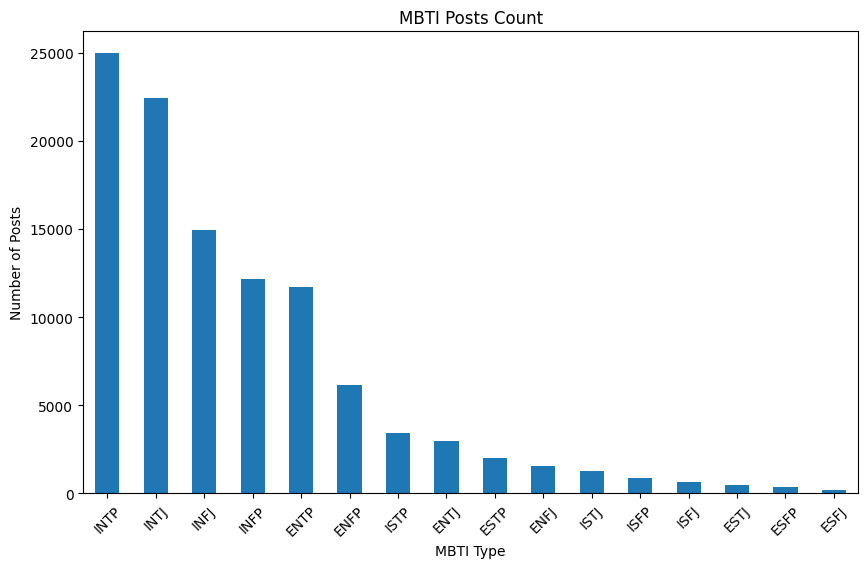

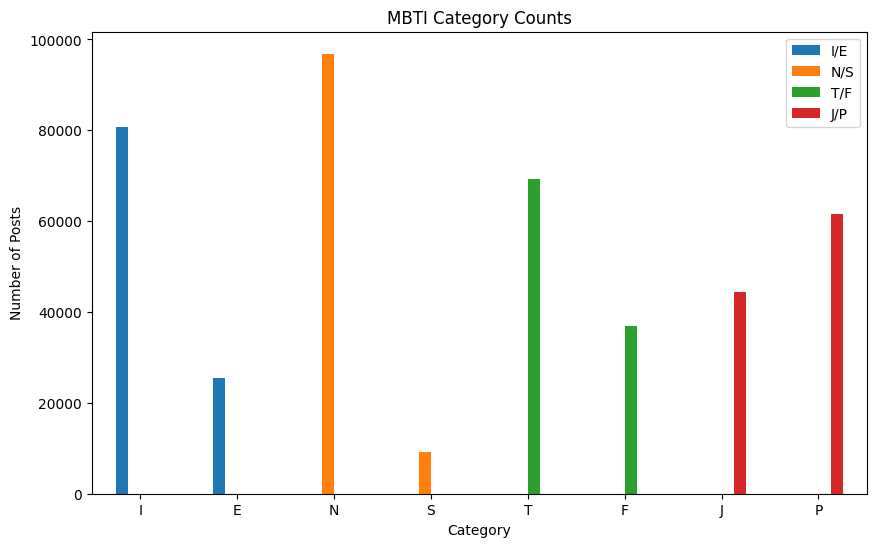

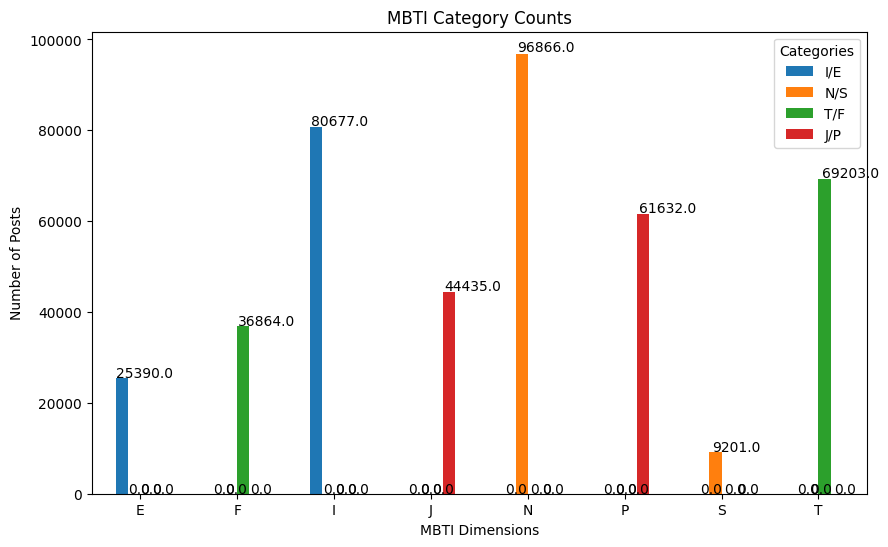

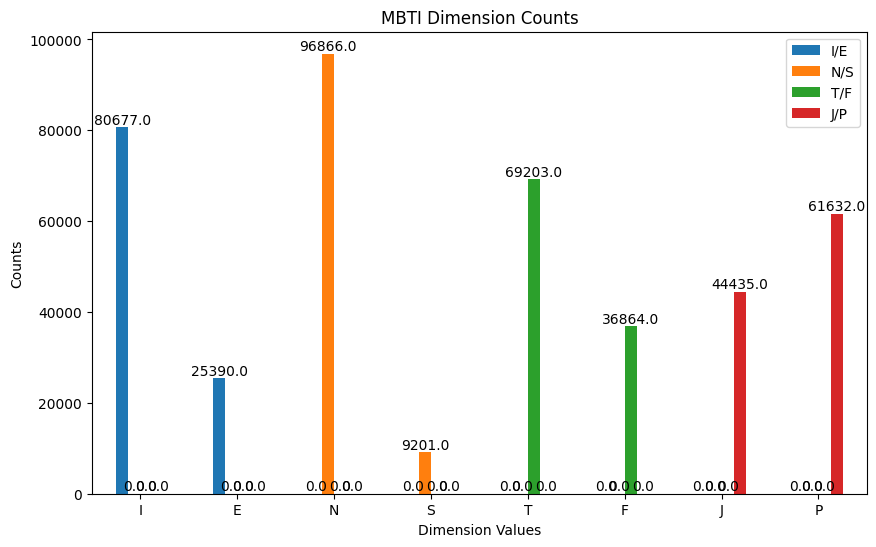

        ability      able  absolutely  abstract    accept  account  accurate  \
0           0.0  0.000000         0.0       0.0  0.000000  0.00000       0.0   
1           0.0  3.970755         0.0       0.0  5.158386  0.00000       0.0   
2           0.0  0.000000         0.0       0.0  2.579193  0.00000       0.0   
3           0.0  0.000000         0.0       0.0  2.579193  0.00000       0.0   
4           0.0  0.000000         0.0       0.0  0.000000  0.00000       0.0   
...         ...       ...         ...       ...       ...      ...       ...   
106062      0.0  1.985378         0.0       0.0  0.000000  0.00000       0.0   
106063      0.0  1.985378         0.0       0.0  0.000000  3.36983       0.0   
106064      0.0  0.000000         0.0       0.0  0.000000  0.00000       0.0   
106065      0.0  3.970755         0.0       0.0  0.000000  0.00000       0.0   
106066      0.0  1.985378         0.0       0.0  0.000000  0.00000       0.0   

         achieve  across       act  ...

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import kagglehub

path = kagglehub.dataset_download("zeyadkhalid/mbti-personality-types-500-dataset")
print("Path to dataset files:", path)

data = pd.read_csv(f"{path}/MBTI 500.csv")
df = pd.read_csv(f"{path}/MBTI 500.csv")

mbti_counts = df['type'].value_counts()

# 打印统计结果
print(mbti_counts)

# 绘制直方图
plt.figure(figsize=(10, 6))  # 设置图的大小
mbti_counts.plot(kind='bar')  # 选择条形图
plt.title('MBTI Posts Count')  # 设置图标题
plt.xlabel('MBTI Type')  # 设置x轴标签
plt.ylabel('Number of Posts')  # 设置y轴标签
plt.xticks(rotation=45)  # 旋转x轴标签以更好显示
plt.show()  # 显示图像

# 假设df是从文件中正确加载的DataFrame，并且 'type' 列包含了MBTI类型

# 去除NaN值
df = df.dropna(subset=['type'])

# 计算每个分类的数量
categories = ['I/E', 'N/S', 'T/F', 'J/P']
counts = {category: {'I': 0, 'E': 0, 'N': 0, 'S': 0, 'T': 0, 'F': 0, 'J': 0, 'P': 0} for category in categories}

for index, row in df.iterrows():
    mbti_type = row['type']
    counts['I/E'][mbti_type[0]] += 1
    counts['N/S'][mbti_type[1]] += 1
    counts['T/F'][mbti_type[2]] += 1
    counts['J/P'][mbti_type[3]] += 1

# 转换计数到DataFrame准备绘图
df_counts = pd.DataFrame(counts)

# 绘制直方图
df_counts.plot(kind='bar', figsize=(10, 6))
plt.title('MBTI Category Counts')
plt.xlabel('Category')
plt.ylabel('Number of Posts')
plt.xticks(rotation=0)  # 设置x轴标签不旋转
plt.show()



# 分类计数
i_e_count = df['type'].str[0].value_counts()
n_s_count = df['type'].str[1].value_counts()
t_f_count = df['type'].str[2].value_counts()
j_p_count = df['type'].str[3].value_counts()

# 合并成一个DataFrame以便绘图
category_counts = pd.DataFrame({
    'I/E': i_e_count,
    'N/S': n_s_count,
    'T/F': t_f_count,
    'J/P': j_p_count
})

# 绘制直方图
ax = category_counts.plot(kind='bar', figsize=(10, 6))

# 在条形上方添加数据标签
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.title('MBTI Category Counts')
plt.xlabel('MBTI Dimensions')
plt.ylabel('Number of Posts')
plt.xticks(rotation=0)
plt.legend(title='Categories')
plt.show()



# 示例数据，确保df已被正确定义并包含了MBTI的type列
# df = pd.read_csv('your_file.csv')

# 计数
i_e_count = df['type'].apply(lambda x: x[0]).value_counts().reindex(['I', 'E'])
n_s_count = df['type'].apply(lambda x: x[1]).value_counts().reindex(['N', 'S'])
t_f_count = df['type'].apply(lambda x: x[2]).value_counts().reindex(['T', 'F'])
j_p_count = df['type'].apply(lambda x: x[3]).value_counts().reindex(['J', 'P'])

# 将4个系列合并到一个DataFrame
counts_df = pd.concat([i_e_count, n_s_count, t_f_count, j_p_count], axis=1)
counts_df.columns = ['I/E', 'N/S', 'T/F', 'J/P']

# 绘图
fig, ax = plt.subplots(figsize=(10, 6))
counts_df.plot(kind='bar', ax=ax)

plt.title('MBTI Dimension Counts')
plt.xlabel('Dimension Values')
plt.ylabel('Counts')
plt.xticks(rotation=0)

# 为每个条形添加数量标签
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')

plt.show()

from sklearn.feature_extraction.text import TfidfVectorizer


df_origin = df
df_origin.rename(columns={'type': 'type_mbti'}, inplace=True)

mbti_Vectoriser = TfidfVectorizer(norm = None, max_features= 1000,max_df= 0.9)
mbti_tf_idf= mbti_Vectoriser.fit_transform(df_origin['posts'])

feature_names = mbti_Vectoriser.get_feature_names_out()

index = [i for i, _ in enumerate(df_origin['posts'])]
df_mbti_tf_idf = pd.DataFrame(mbti_tf_idf.T.todense(), index= feature_names, columns= index)
df_mbti_tf_idf = df_mbti_tf_idf.T

type_df = pd.DataFrame(df_origin['type_mbti'])
df = pd.concat([df_mbti_tf_idf, type_df], axis=1)
print(df)

# 用于存储各类型抽取结果的DataFrame
sampled_df = pd.DataFrame()

# 获取MBTI的所有独特类型
mbti_types = df['type_mbti'].unique()

# 对于每个类型，随机抽取150条数据
for mbti in mbti_types:
    sampled_subset = df[df['type_mbti'] == mbti].sample(n=150, random_state=42)
    sampled_df = pd.concat([sampled_df, sampled_subset])

# 重置索引
sampled_df.reset_index(drop=True, inplace=True)
df = sampled_df
# 显示抽样结果的大小，确认抽样数量
print("Total number of sampled data:", len(sampled_df))
print(df)

mbti_type = pd.DataFrame
mbti_type = df['type_mbti']

label_map_all = {
    'ISTJ': 1, 'ISFJ': 2, 'INFJ': 3, 'INTJ': 4,
    'ISTP': 5, 'ISFP': 6, 'INFP': 7, 'INTP': 8,
    'ESTP': 9, 'ESFP': 10, 'ENFP':11, 'ENTP':12,
    'ESTJ': 13, 'ESFJ':14, 'ENFJ':15, 'ENTJ':16
}

label_map_ie = {
    'ISTJ': 1, 'ISFJ': 1, 'INFJ': 1, 'INTJ': 1,
    'ISTP': 1, 'ISFP': 1, 'INFP': 1, 'INTP': 1,
    'ESTP': 2, 'ESFP': 2, 'ENFP': 2, 'ENTP': 2,
    'ESTJ': 2, 'ESFJ': 2, 'ENFJ': 2, 'ENTJ': 2
}
label_map_sn = {
    'ISTJ': 1, 'ISFJ': 1, 'INFJ': 2, 'INTJ': 2,
    'ISTP': 1, 'ISFP': 1, 'INFP': 2, 'INTP': 2,
    'ESTP': 1, 'ESFP': 1, 'ENFP': 2, 'ENTP': 2,
    'ESTJ': 1, 'ESFJ': 1, 'ENFJ': 2, 'ENTJ': 2
}
label_map_tf = {
    'ISTJ': 1, 'ISFJ': 2, 'INFJ': 2, 'INTJ': 1,
    'ISTP': 1, 'ISFP': 2, 'INFP': 2, 'INTP': 1,
    'ESTP': 1, 'ESFP': 2, 'ENFP': 2, 'ENTP': 1,
    'ESTJ': 1, 'ESFJ': 2, 'ENFJ': 2, 'ENTJ': 1
}
label_map_jp = {
    'ISTJ': 1, 'ISFJ': 1, 'INFJ': 1, 'INTJ': 1,
    'ISTP': 2, 'ISFP': 2, 'INFP': 2, 'INTP': 2,
    'ESTP': 2, 'ESFP': 2, 'ENFP': 2, 'ENTP': 2,
    'ESTJ': 1, 'ESFJ': 1, 'ENFJ': 1, 'ENTJ': 1
}

import pandas as pd

# 創建新的 DataFrame，複製舊 DataFrame 中的所有列
new_df = df.copy()

# 使用 map 函數將 MBTI 類型映射為對應的數字或類別，填充到五個新列中
new_df['mbti_all'] = df['type_mbti'].map(label_map_all)
new_df['mbti_ie'] = df['type_mbti'].map(label_map_ie)
new_df['mbti_sn'] = df['type_mbti'].map(label_map_sn)
new_df['mbti_tf'] = df['type_mbti'].map(label_map_tf)
new_df['mbti_jp'] = df['type_mbti'].map(label_map_jp)

# 刪除原來的 'type_mbti' 列
new_df.drop(columns=['type_mbti'], inplace=True)

print(new_df)

import numpy as np
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

X = new_df.iloc[:, :-5]
y = new_df['mbti_tf']

lasso_model = Lasso(alpha=0.01)  # alpha 是正则化参数，可以调整以控制稀疏性和模型性能

# 在训练集上拟合模型
lasso_model.fit(X, y)

# 在测试集上进行预测
y_pred = lasso_model.predict(X)

# 计算均方误差
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

# 獲取 LASSO 模型中的係數
lasso_coefs = lasso_model.coef_

# 獲取非零係數的索引
non_zero_indices = np.where(lasso_coefs != 0)[0]

# 獲取非零係數及其對應的特徵名稱
non_zero_coefs = lasso_coefs[non_zero_indices]
non_zero_feature_names = X.columns[non_zero_indices]

# 列印非零係數及其對應的特徵名稱
for coef, feature_name in zip(non_zero_coefs, non_zero_feature_names):
    print(f"Feature: {feature_name}, Coefficient: {coef}")

print(len(non_zero_coefs))


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 차원별 라벨 매핑
df['mbti_ie'] = df['type_mbti'].apply(lambda x: 1 if x[0] == 'E' else 0)
df['mbti_ns'] = df['type_mbti'].apply(lambda x: 1 if x[1] == 'S' else 0)
df['mbti_tf'] = df['type_mbti'].apply(lambda x: 1 if x[2] == 'F' else 0)
df['mbti_jp'] = df['type_mbti'].apply(lambda x: 1 if x[3] == 'P' else 0)

# 차원별로 데이터셋 준비
X = df.iloc[:, :-4]  # 특징 데이터

# 차원별로 데이터셋 준비
X = df.drop(columns=['type_mbti', 'mbti_ie', 'mbti_ns', 'mbti_tf', 'mbti_jp'])  # 특징 데이터에서 MBTI 관련 열 제거
y_labels = {
    'I/E': df['mbti_ie'],
    'N/S': df['mbti_ns'],
    'T/F': df['mbti_tf'],
    'J/P': df['mbti_jp']
}

# 결과 저장을 위한 딕셔너리
results = {}


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# 데이터 준비: 각 MBTI 유형을 고유한 정수 라벨로 변환
le = LabelEncoder()
df['mbti_label'] = le.fit_transform(df['type_mbti'])  # 각 유형을 0~15 사이의 정수로 변환

# 입력(X)과 라벨(y) 분리
X = df.drop(columns=['type_mbti', 'mbti_label'])  # 입력 특징 데이터
y = df['mbti_label']  # 16개 클래스 레이블

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 분류 모델 초기화 (RandomForest 사용 예시)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# 예측
y_pred = rf_classifier.predict(X_test)

# 원래 MBTI 유형으로 변환
y_test_labels = le.inverse_transform(y_test)  # 테스트 라벨을 원래 MBTI 유형으로 변환
y_pred_labels = le.inverse_transform(y_pred)  # 예측 결과를 원래 MBTI 유형으로 변환

# 성능 평가
print("Confusion Matrix:\n", confusion_matrix(y_test_labels, y_pred_labels))
print("Classification Report:\n", classification_report(y_test_labels, y_pred_labels))
print("Accuracy:", accuracy_score(y_test_labels, y_pred_labels))


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
import kagglehub

# Kaggle 데이터 다운로드
path = kagglehub.dataset_download("zeyadkhalid/mbti-personality-types-500-dataset")
print("Path to dataset files:", path)

# 데이터 로드 및 전처리
df = pd.read_csv(f"{path}/MBTI 500.csv")
df = df.dropna(subset=['type', 'posts'])

# TF-IDF 변환
vectorizer = TfidfVectorizer(max_features=1000, max_df=0.9)
X = vectorizer.fit_transform(df['posts']).toarray()

# 각 차원별 레이블 생성
df['I_E'] = df['type'].apply(lambda x: 1 if x[0] == 'E' else 0)
df['N_S'] = df['type'].apply(lambda x: 1 if x[1] == 'S' else 0)
df['T_F'] = df['type'].apply(lambda x: 1 if x[2] == 'F' else 0)
df['J_P'] = df['type'].apply(lambda x: 1 if x[3] == 'P' else 0)

# DownSampling 함수 정의
def downsample(df, target_col):
    minority_class_size = df[target_col].value_counts().min()
    df_majority = df[df[target_col] == df[target_col].value_counts().idxmax()]
    df_minority = df[df[target_col] == df[target_col].value_counts().idxmin()]
    df_majority_downsampled = resample(
        df_majority,
        replace=False,
        n_samples=minority_class_size,
        random_state=42
    )
    df_balanced = pd.concat([df_majority_downsampled, df_minority])
    return df_balanced

# 각 차원별 DownSampling 수행
df_ie_balanced = downsample(df, 'I_E')
df_ns_balanced = downsample(df, 'N_S')
df_tf_balanced = downsample(df, 'T_F')
df_jp_balanced = downsample(df, 'J_P')

# DownSampling 후 데이터 확인
print("I_E Balance:\n", df_ie_balanced['I_E'].value_counts())
print("N_S Balance:\n", df_ns_balanced['N_S'].value_counts())
print("T_F Balance:\n", df_tf_balanced['T_F'].value_counts())
print("J_P Balance:\n", df_jp_balanced['J_P'].value_counts())

# 학습 및 평가 함수 정의
def train_and_predict(X_train, y_train, X_test, y_test, label):
    model = LGBMClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {label}: {accuracy}")
    return model

# 각 차원별 데이터 분할 및 모델 학습
def prepare_and_train(df_balanced, label):
    X_balanced = vectorizer.transform(df_balanced['posts']).toarray()
    y_balanced = df_balanced[label]
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
    model = train_and_predict(X_train, y_train, X_test, y_test, label)
    return model, X_test, y_test

model_ie, X_test_ie, y_test_ie = prepare_and_train(df_ie_balanced, 'I_E')
model_ns, X_test_ns, y_test_ns = prepare_and_train(df_ns_balanced, 'N_S')
model_tf, X_test_tf, y_test_tf = prepare_and_train(df_tf_balanced, 'T_F')
model_jp, X_test_jp, y_test_jp = prepare_and_train(df_jp_balanced, 'J_P')

# 최종 MBTI 예측 함수 정의
def calculate_final_accuracy(X_test, y_test_full):
    predictions = []
    for x in X_test:
        x = x.reshape(1, -1)
        ie = 'E' if model_ie.predict(x)[0] == 1 else 'I'
        ns = 'S' if model_ns.predict(x)[0] == 1 else 'N'
        tf = 'F' if model_tf.predict(x)[0] == 1 else 'T'
        jp = 'P' if model_jp.predict(x)[0] == 1 else 'J'
        predictions.append(ie + ns + tf + jp)

    correct_predictions = sum([1 for true, pred in zip(y_test_full, predictions) if true == pred])
    final_accuracy = correct_predictions / len(y_test_full)
    return final_accuracy

# 전체 MBTI 유형 데이터로 예측
X_full_test, y_full_test = vectorizer.transform(df['posts']).toarray(), df['type']
final_accuracy = calculate_final_accuracy(X_full_test, y_full_test)
print("Final MBTI Prediction Accuracy:", final_accuracy)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Path to dataset files: /root/.cache/kagglehub/datasets/zeyadkhalid/mbti-personality-types-500-dataset/versions/1
I_E Balance:
 I_E
0    25390
1    25390
Name: count, dtype: int64
N_S Balance:
 N_S
0    9201
1    9201
Name: count, dtype: int64
T_F Balance:
 T_F
0    36864
1    36864
Name: count, dtype: int64
J_P Balance:
 J_P
1    44435
0    44435
Name: count, dtype: int64
[LightGBM] [Info] Number of positive: 20296, number of negative: 20328
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.272428 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255000
[LightGBM] [Info] Number of data points in the train set: 40624, number of used features: 1000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499606 -> initscore=-0.001575
[LightGBM] [Info] Start training from score -0.001575
Accuracy for I_E: 0.8571287908625443
[LightGBM] [Info] Number of positive: 7388, number of negative: 7333
[LightGBM] [Info] Aut

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import kagglehub

# Kaggle 데이터 다운로드
path = kagglehub.dataset_download("zeyadkhalid/mbti-personality-types-500-dataset")
print("Path to dataset files:", path)

# 데이터 로드 및 전처리
df = pd.read_csv(f"{path}/MBTI 500.csv")
df = df.dropna(subset=['type', 'posts'])

# TF-IDF 변환
vectorizer = TfidfVectorizer(max_features=1000, max_df=0.9)
X = vectorizer.fit_transform(df['posts']).toarray()

# 각 차원별 레이블 생성
df['I_E'] = df['type'].apply(lambda x: 1 if x[0] == 'E' else 0)
df['N_S'] = df['type'].apply(lambda x: 1 if x[1] == 'S' else 0)
df['T_F'] = df['type'].apply(lambda x: 1 if x[2] == 'F' else 0)
df['J_P'] = df['type'].apply(lambda x: 1 if x[3] == 'P' else 0)

# DownSampling 함수 정의
def downsample(df, target_col):
    minority_class_size = df[target_col].value_counts().min()
    df_majority = df[df[target_col] == df[target_col].value_counts().idxmax()]
    df_minority = df[df[target_col] == df[target_col].value_counts().idxmin()]
    df_majority_downsampled = resample(
        df_majority,
        replace=False,
        n_samples=minority_class_size,
        random_state=42
    )
    df_balanced = pd.concat([df_majority_downsampled, df_minority])
    return df_balanced

# 각 차원별 DownSampling 수행
df_ie_balanced = downsample(df, 'I_E')
df_ns_balanced = downsample(df, 'N_S')
df_tf_balanced = downsample(df, 'T_F')
df_jp_balanced = downsample(df, 'J_P')

# DownSampling 후 데이터 확인
print("I_E Balance:\n", df_ie_balanced['I_E'].value_counts())
print("N_S Balance:\n", df_ns_balanced['N_S'].value_counts())
print("T_F Balance:\n", df_tf_balanced['T_F'].value_counts())
print("J_P Balance:\n", df_jp_balanced['J_P'].value_counts())

# 학습 및 평가 함수 정의
def train_and_predict(X_train, y_train, X_test, y_test, label):
    model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, subsample= 0.8, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {label}: {accuracy}")
    return model

# 각 차원별 데이터 분할 및 모델 학습
def prepare_and_train(df_balanced, label):
    X_balanced = vectorizer.transform(df_balanced['posts']).toarray()
    y_balanced = df_balanced[label]
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
    model = train_and_predict(X_train, y_train, X_test, y_test, label)
    return model, X_test, y_test

model_ie, X_test_ie, y_test_ie = prepare_and_train(df_ie_balanced, 'I_E')
model_ns, X_test_ns, y_test_ns = prepare_and_train(df_ns_balanced, 'N_S')
model_tf, X_test_tf, y_test_tf = prepare_and_train(df_tf_balanced, 'T_F')
model_jp, X_test_jp, y_test_jp = prepare_and_train(df_jp_balanced, 'J_P')

# 최종 MBTI 예측 함수 정의
def calculate_final_accuracy(X_test, y_test_full):
    predictions = []
    for x in X_test:
        x = x.reshape(1, -1)
        ie = 'E' if model_ie.predict(x)[0] == 1 else 'I'
        ns = 'S' if model_ns.predict(x)[0] == 1 else 'N'
        tf = 'F' if model_tf.predict(x)[0] == 1 else 'T'
        jp = 'P' if model_jp.predict(x)[0] == 1 else 'J'
        predictions.append(ie + ns + tf + jp)

    correct_predictions = sum([1 for true, pred in zip(y_test_full, predictions) if true == pred])
    final_accuracy = correct_predictions / len(y_test_full)
    return final_accuracy

# 전체 MBTI 유형 데이터로 예측
X_full_test, y_full_test = vectorizer.transform(df['posts']).toarray(), df['type']
final_accuracy = calculate_final_accuracy(X_full_test, y_full_test)
print("Final MBTI Prediction Accuracy:", final_accuracy)




Path to dataset files: /root/.cache/kagglehub/datasets/zeyadkhalid/mbti-personality-types-500-dataset/versions/1
I_E Balance:
 I_E
0    25390
1    25390
Name: count, dtype: int64
N_S Balance:
 N_S
0    9201
1    9201
Name: count, dtype: int64
T_F Balance:
 T_F
0    36864
1    36864
Name: count, dtype: int64
J_P Balance:
 J_P
1    44435
0    44435
Name: count, dtype: int64


KeyboardInterrupt: 

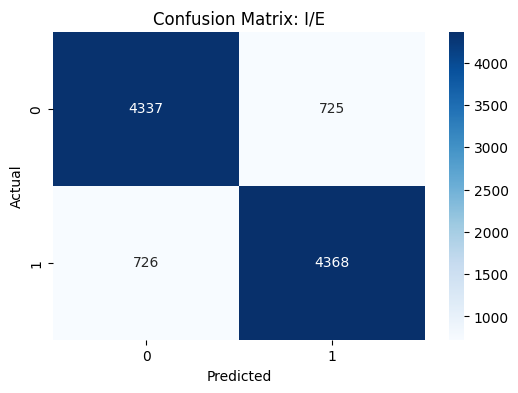

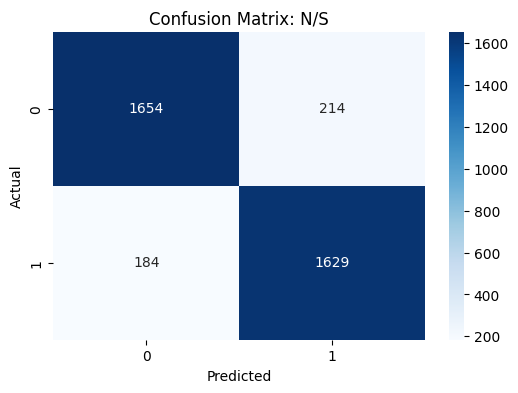

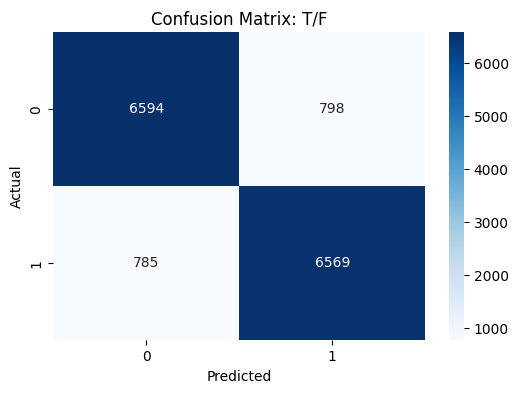

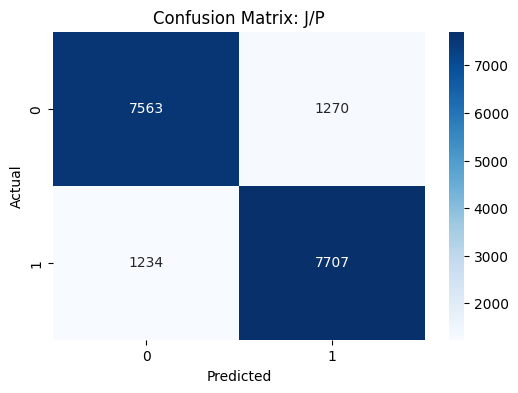

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix 시각화 함수 정의
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
    plt.title(f"Confusion Matrix: {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Confusion Matrix 계산 및 시각화 함수 정의
def calculate_and_plot_confusion(models, X_tests, y_tests, labels):
    for model, X_test, y_test, label in zip(models, X_tests, y_tests, labels):
        y_pred = model.predict(X_test)
        plot_confusion_matrix(y_test, y_pred, title=label)

# 모델과 데이터 리스트 준비
models = [model_ie, model_ns, model_tf, model_jp]
X_tests = [X_test_ie, X_test_ns, X_test_tf, X_test_jp]
y_tests = [y_test_ie, y_test_ns, y_test_tf, y_test_jp]
labels = ["I/E", "N/S", "T/F", "J/P"]

# Confusion Matrix 출력
calculate_and_plot_confusion(models, X_tests, y_tests, labels)


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import kagglehub

# Kaggle 데이터 다운로드
path = kagglehub.dataset_download("zeyadkhalid/mbti-personality-types-500-dataset")
print("Path to dataset files:", path)

# 데이터 로드 및 전처리
df = pd.read_csv(f"{path}/MBTI 500.csv")
df = df.dropna(subset=['type', 'posts'])


# TF-IDF 변환
vectorizer = TfidfVectorizer(max_features=1000, max_df=0.9)
X = vectorizer.fit_transform(df['posts']).toarray()

# 각 차원별 레이블 생성
df['I_E'] = df['type'].apply(lambda x: 1 if x[0] == 'E' else 0)
df['N_S'] = df['type'].apply(lambda x: 1 if x[1] == 'S' else 0)
df['T_F'] = df['type'].apply(lambda x: 1 if x[2] == 'F' else 0)
df['J_P'] = df['type'].apply(lambda x: 1 if x[3] == 'P' else 0)

# DownSampling 함수 정의
def downsample(df, target_col):
    minority_class_size = df[target_col].value_counts().min()
    df_majority = df[df[target_col] == df[target_col].value_counts().idxmax()]
    df_minority = df[df[target_col] == df[target_col].value_counts().idxmin()]
    df_majority_downsampled = resample(
        df_majority,
        replace=False,
        n_samples=minority_class_size,
        random_state=42
    )
    df_balanced = pd.concat([df_majority_downsampled, df_minority])
    return df_balanced

# 각 차원별 DownSampling 수행
df_ie_balanced = downsample(df, 'I_E')
df_ns_balanced = downsample(df, 'N_S')
df_tf_balanced = downsample(df, 'T_F')
df_jp_balanced = downsample(df, 'J_P')

# DownSampling 후 데이터 확인
print("I_E Balance:\n", df_ie_balanced['I_E'].value_counts())
print("N_S Balance:\n", df_ns_balanced['N_S'].value_counts())
print("T_F Balance:\n", df_tf_balanced['T_F'].value_counts())
print("J_P Balance:\n", df_jp_balanced['J_P'].value_counts())

# 학습 및 평가 함수 정의 (LightGBM 하이퍼파라미터 튜닝 포함)
def train_and_predict(X_train, y_train, X_test, y_test, label):
    # LightGBM 모델 정의 및 하이퍼파라미터 설정
    model = LGBMClassifier(
        num_leaves=36,  # 트리의 최대 리프 노드 수
        max_depth=11,   # 트리의 최대 깊이
        learning_rate=0.1,  # 학습률
        n_estimators=500,    # 부스팅 라운드 수
        min_child_samples=20,  # 리프 노드에 필요한 최소 데이터 수
        subsample=0.8,  # 데이터 샘플링 비율
        colsample_bytree=0.8,  # 각 트리별 피처 샘플링 비율
        random_state=42
    )

    # 모델 학습
    model.fit(X_train, y_train)

    # 예측 및 평가
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {label}: {accuracy}")
    return model

# 각 차원별 데이터 분할 및 모델 학습
def prepare_and_train(df_balanced, label):
    X_balanced = vectorizer.transform(df_balanced['posts']).toarray()
    y_balanced = df_balanced[label]
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
    model = train_and_predict(X_train, y_train, X_test, y_test, label)
    return model, X_test, y_test

# 각 차원별 학습
model_ie, X_test_ie, y_test_ie = prepare_and_train(df_ie_balanced, 'I_E')
model_ns, X_test_ns, y_test_ns = prepare_and_train(df_ns_balanced, 'N_S')
model_tf, X_test_tf, y_test_tf = prepare_and_train(df_tf_balanced, 'T_F')
model_jp, X_test_jp, y_test_jp = prepare_and_train(df_jp_balanced, 'J_P')

# 최종 MBTI 예측 및 정확도 계산
def calculate_final_accuracy(X_test, y_test_full):
    predictions = []
    for x in X_test:
        x = x.reshape(1, -1)
        ie = 'E' if model_ie.predict(x)[0] == 1 else 'I'
        ns = 'S' if model_ns.predict(x)[0] == 1 else 'N'
        tf = 'F' if model_tf.predict(x)[0] == 1 else 'T'
        jp = 'P' if model_jp.predict(x)[0] == 1 else 'J'
        predictions.append(ie + ns + tf + jp)

    correct_predictions = sum([1 for true, pred in zip(y_test_full, predictions) if true == pred])
    final_accuracy = correct_predictions / len(y_test_full)
    return final_accuracy

# 전체 MBTI 유형 데이터로 최종 예측
X_full_test, y_full_test = vectorizer.transform(df['posts']).toarray(), df['type']
final_accuracy = calculate_final_accuracy(X_full_test, y_full_test)
print("Final MBTI Prediction Accuracy with tuned parameters:", final_accuracy)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


100%|██████████| 123M/123M [00:01<00:00, 66.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/zeyadkhalid/mbti-personality-types-500-dataset/versions/1
I_E Balance:
 I_E
0    25390
1    25390
Name: count, dtype: int64
N_S Balance:
 N_S
0    9201
1    9201
Name: count, dtype: int64
T_F Balance:
 T_F
0    36864
1    36864
Name: count, dtype: int64
J_P Balance:
 J_P
1    44435
0    44435
Name: count, dtype: int64
[LightGBM] [Info] Number of positive: 20296, number of negative: 20328
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.156442 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255000
[LightGBM] [Info] Number of data points in the train set: 40624, number of used features: 1000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499606 -> initscore=-0.001575
[LightGBM] [Info] Start training from score -0.001575
Accuracy for I_E: 0.8685506104765656
[LightGBM] [Info] Number of positive: 7388, number of negative: 7333
[LightGBM] [Info] Aut

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import kagglehub

# Kaggle 데이터 다운로드
path = kagglehub.dataset_download("zeyadkhalid/mbti-personality-types-500-dataset")
print("Path to dataset files:", path)

# 데이터 로드 및 전처리
df = pd.read_csv(f"{path}/MBTI 500.csv")
df = df.dropna(subset=['type', 'posts'])


# TF-IDF 변환
vectorizer = TfidfVectorizer(max_features=1000, max_df=0.9)
X = vectorizer.fit_transform(df['posts']).toarray()

# 각 차원별 레이블 생성
df['I_E'] = df['type'].apply(lambda x: 1 if x[0] == 'E' else 0)
df['N_S'] = df['type'].apply(lambda x: 1 if x[1] == 'S' else 0)
df['T_F'] = df['type'].apply(lambda x: 1 if x[2] == 'F' else 0)
df['J_P'] = df['type'].apply(lambda x: 1 if x[3] == 'P' else 0)

# DownSampling 함수 정의
def downsample(df, target_col):
    minority_class_size = df[target_col].value_counts().min()
    df_majority = df[df[target_col] == df[target_col].value_counts().idxmax()]
    df_minority = df[df[target_col] == df[target_col].value_counts().idxmin()]
    df_majority_downsampled = resample(
        df_majority,
        replace=False,
        n_samples=minority_class_size,
        random_state=42
    )
    df_balanced = pd.concat([df_majority_downsampled, df_minority])
    return df_balanced

# 각 차원별 DownSampling 수행
df_ie_balanced = downsample(df, 'I_E')
df_ns_balanced = downsample(df, 'N_S')
df_tf_balanced = downsample(df, 'T_F')
df_jp_balanced = downsample(df, 'J_P')

# DownSampling 후 데이터 확인
print("I_E Balance:\n", df_ie_balanced['I_E'].value_counts())
print("N_S Balance:\n", df_ns_balanced['N_S'].value_counts())
print("T_F Balance:\n", df_tf_balanced['T_F'].value_counts())
print("J_P Balance:\n", df_jp_balanced['J_P'].value_counts())

# 학습 및 평가 함수 정의 (LightGBM 하이퍼파라미터 튜닝 포함)
def train_and_predict(X_train, y_train, X_test, y_test, label):
    # LightGBM 모델 정의 및 하이퍼파라미터 설정
    model = LGBMClassifier(
        num_leaves=34,  # 트리의 최대 리프 노드 수
        max_depth=12,   # 트리의 최대 깊이
        learning_rate=0.1,  # 학습률
        n_estimators=500,    # 부스팅 라운드 수
        min_child_samples=20,  # 리프 노드에 필요한 최소 데이터 수
        subsample=0.8,  # 데이터 샘플링 비율
        colsample_bytree=0.8,  # 각 트리별 피처 샘플링 비율
        random_state=42
    )

    # 모델 학습
    model.fit(X_train, y_train)

    # 예측 및 평가
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {label}: {accuracy}")
    return model

# 각 차원별 데이터 분할 및 모델 학습
def prepare_and_train(df_balanced, label):
    X_balanced = vectorizer.transform(df_balanced['posts']).toarray()
    y_balanced = df_balanced[label]
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
    model = train_and_predict(X_train, y_train, X_test, y_test, label)
    return model, X_test, y_test

# 각 차원별 학습
model_ie, X_test_ie, y_test_ie = prepare_and_train(df_ie_balanced, 'I_E')
model_ns, X_test_ns, y_test_ns = prepare_and_train(df_ns_balanced, 'N_S')
model_tf, X_test_tf, y_test_tf = prepare_and_train(df_tf_balanced, 'T_F')
model_jp, X_test_jp, y_test_jp = prepare_and_train(df_jp_balanced, 'J_P')

# 최종 MBTI 예측 및 정확도 계산
def calculate_final_accuracy(X_test, y_test_full):
    predictions = []
    for x in X_test:
        x = x.reshape(1, -1)
        ie = 'E' if model_ie.predict(x)[0] == 1 else 'I'
        ns = 'S' if model_ns.predict(x)[0] == 1 else 'N'
        tf = 'F' if model_tf.predict(x)[0] == 1 else 'T'
        jp = 'P' if model_jp.predict(x)[0] == 1 else 'J'
        predictions.append(ie + ns + tf + jp)

    correct_predictions = sum([1 for true, pred in zip(y_test_full, predictions) if true == pred])
    final_accuracy = correct_predictions / len(y_test_full)
    return final_accuracy

# 전체 MBTI 유형 데이터로 최종 예측
X_full_test, y_full_test = vectorizer.transform(df['posts']).toarray(), df['type']
final_accuracy = calculate_final_accuracy(X_full_test, y_full_test)
print("Final MBTI Prediction Accuracy with tuned parameters:", final_accuracy)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Path to dataset files: /root/.cache/kagglehub/datasets/zeyadkhalid/mbti-personality-types-500-dataset/versions/1
I_E Balance:
 I_E
0    25390
1    25390
Name: count, dtype: int64
N_S Balance:
 N_S
0    9201
1    9201
Name: count, dtype: int64
T_F Balance:
 T_F
0    36864
1    36864
Name: count, dtype: int64
J_P Balance:
 J_P
1    44435
0    44435
Name: count, dtype: int64
[LightGBM] [Info] Number of positive: 20296, number of negative: 20328
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.295112 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255000
[LightGBM] [Info] Number of data points in the train set: 40624, number of used features: 1000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499606 -> initscore=-0.001575
[LightGBM] [Info] Start training from score -0.001575
Accuracy for I_E: 0.8703229617959827
[LightGBM] [Info] Number of positive: 7388, number of negative: 7333
[LightGBM] [Info] Aut

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import kagglehub

# Kaggle 데이터 다운로드
path = kagglehub.dataset_download("zeyadkhalid/mbti-personality-types-500-dataset")
print("Path to dataset files:", path)

# 데이터 로드 및 전처리
df = pd.read_csv(f"{path}/MBTI 500.csv")
df = df.dropna(subset=['type', 'posts'])


# TF-IDF 변환
vectorizer = TfidfVectorizer(max_features=1000, max_df=0.9)
X = vectorizer.fit_transform(df['posts']).toarray()

# 각 차원별 레이블 생성
df['I_E'] = df['type'].apply(lambda x: 1 if x[0] == 'E' else 0)
df['N_S'] = df['type'].apply(lambda x: 1 if x[1] == 'S' else 0)
df['T_F'] = df['type'].apply(lambda x: 1 if x[2] == 'F' else 0)
df['J_P'] = df['type'].apply(lambda x: 1 if x[3] == 'P' else 0)

# DownSampling 함수 정의
def downsample(df, target_col):
    minority_class_size = df[target_col].value_counts().min()
    df_majority = df[df[target_col] == df[target_col].value_counts().idxmax()]
    df_minority = df[df[target_col] == df[target_col].value_counts().idxmin()]
    df_majority_downsampled = resample(
        df_majority,
        replace=False,
        n_samples=minority_class_size,
        random_state=42
    )
    df_balanced = pd.concat([df_majority_downsampled, df_minority])
    return df_balanced

# 각 차원별 DownSampling 수행
df_ie_balanced = downsample(df, 'I_E')
df_ns_balanced = downsample(df, 'N_S')
df_tf_balanced = downsample(df, 'T_F')
df_jp_balanced = downsample(df, 'J_P')

# DownSampling 후 데이터 확인
print("I_E Balance:\n", df_ie_balanced['I_E'].value_counts())
print("N_S Balance:\n", df_ns_balanced['N_S'].value_counts())
print("T_F Balance:\n", df_tf_balanced['T_F'].value_counts())
print("J_P Balance:\n", df_jp_balanced['J_P'].value_counts())

# 학습 및 평가 함수 정의 (LightGBM 하이퍼파라미터 튜닝 포함)
def train_and_predict(X_train, y_train, X_test, y_test, label):
    # LightGBM 모델 정의 및 하이퍼파라미터 설정
    model = LGBMClassifier(
        num_leaves=36,  # 트리의 최대 리프 노드 수
        max_depth=11,   # 트리의 최대 깊이
        learning_rate=0.01,  # 학습률
        n_estimators=500,    # 부스팅 라운드 수
        min_child_samples=20,  # 리프 노드에 필요한 최소 데이터 수
        subsample=0.8,  # 데이터 샘플링 비율
        colsample_bytree=0.8,  # 각 트리별 피처 샘플링 비율
        random_state=42
    )

    # 모델 학습
    model.fit(X_train, y_train)

    # 예측 및 평가
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {label}: {accuracy}")
    return model

# 각 차원별 데이터 분할 및 모델 학습
def prepare_and_train(df_balanced, label):
    X_balanced = vectorizer.transform(df_balanced['posts']).toarray()
    y_balanced = df_balanced[label]
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
    model = train_and_predict(X_train, y_train, X_test, y_test, label)
    return model, X_test, y_test

# 각 차원별 학습
model_ie, X_test_ie, y_test_ie = prepare_and_train(df_ie_balanced, 'I_E')
model_ns, X_test_ns, y_test_ns = prepare_and_train(df_ns_balanced, 'N_S')
model_tf, X_test_tf, y_test_tf = prepare_and_train(df_tf_balanced, 'T_F')
model_jp, X_test_jp, y_test_jp = prepare_and_train(df_jp_balanced, 'J_P')

# 최종 MBTI 예측 및 정확도 계산
def calculate_final_accuracy(X_test, y_test_full):
    predictions = []
    for x in X_test:
        x = x.reshape(1, -1)
        ie = 'E' if model_ie.predict(x)[0] == 1 else 'I'
        ns = 'S' if model_ns.predict(x)[0] == 1 else 'N'
        tf = 'F' if model_tf.predict(x)[0] == 1 else 'T'
        jp = 'P' if model_jp.predict(x)[0] == 1 else 'J'
        predictions.append(ie + ns + tf + jp)

    correct_predictions = sum([1 for true, pred in zip(y_test_full, predictions) if true == pred])
    final_accuracy = correct_predictions / len(y_test_full)
    return final_accuracy

# 전체 MBTI 유형 데이터로 최종 예측
X_full_test, y_full_test = vectorizer.transform(df['posts']).toarray(), df['type']
final_accuracy = calculate_final_accuracy(X_full_test, y_full_test)
print("Final MBTI Prediction Accuracy with tuned parameters:", final_accuracy)


Path to dataset files: /root/.cache/kagglehub/datasets/zeyadkhalid/mbti-personality-types-500-dataset/versions/1
I_E Balance:
 I_E
0    25390
1    25390
Name: count, dtype: int64
N_S Balance:
 N_S
0    9201
1    9201
Name: count, dtype: int64
T_F Balance:
 T_F
0    36864
1    36864
Name: count, dtype: int64
J_P Balance:
 J_P
1    44435
0    44435
Name: count, dtype: int64
[LightGBM] [Info] Number of positive: 20296, number of negative: 20328
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.546437 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255000
[LightGBM] [Info] Number of data points in the train set: 40624, number of used features: 1000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499606 -> initscore=-0.001575
[LightGBM] [Info] Start training from score -0.001575
Accuracy for I_E: 0.8495470657739267
[LightGBM] [Info] Number of positive: 7388, number of negative: 7333
[LightGBM] [Info] Aut

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import kagglehub

# Kaggle 데이터 다운로드
path = kagglehub.dataset_download("zeyadkhalid/mbti-personality-types-500-dataset")
print("Path to dataset files:", path)

# 데이터 로드 및 전처리
df = pd.read_csv(f"{path}/MBTI 500.csv")
df = df.dropna(subset=['type', 'posts'])


# TF-IDF 변환
vectorizer = TfidfVectorizer(max_features=1000, max_df=0.9)
X = vectorizer.fit_transform(df['posts']).toarray()

# 각 차원별 레이블 생성
df['I_E'] = df['type'].apply(lambda x: 1 if x[0] == 'E' else 0)
df['N_S'] = df['type'].apply(lambda x: 1 if x[1] == 'S' else 0)
df['T_F'] = df['type'].apply(lambda x: 1 if x[2] == 'F' else 0)
df['J_P'] = df['type'].apply(lambda x: 1 if x[3] == 'P' else 0)

# DownSampling 함수 정의
def downsample(df, target_col):
    minority_class_size = df[target_col].value_counts().min()
    df_majority = df[df[target_col] == df[target_col].value_counts().idxmax()]
    df_minority = df[df[target_col] == df[target_col].value_counts().idxmin()]
    df_majority_downsampled = resample(
        df_majority,
        replace=False,
        n_samples=minority_class_size,
        random_state=42
    )
    df_balanced = pd.concat([df_majority_downsampled, df_minority])
    return df_balanced

# 각 차원별 DownSampling 수행
df_ie_balanced = downsample(df, 'I_E')
df_ns_balanced = downsample(df, 'N_S')
df_tf_balanced = downsample(df, 'T_F')
df_jp_balanced = downsample(df, 'J_P')

# DownSampling 후 데이터 확인
print("I_E Balance:\n", df_ie_balanced['I_E'].value_counts())
print("N_S Balance:\n", df_ns_balanced['N_S'].value_counts())
print("T_F Balance:\n", df_tf_balanced['T_F'].value_counts())
print("J_P Balance:\n", df_jp_balanced['J_P'].value_counts())

# 학습 및 평가 함수 정의 (LightGBM 하이퍼파라미터 튜닝 포함)
def train_and_predict(X_train, y_train, X_test, y_test, label):
    # LightGBM 모델 정의 및 하이퍼파라미터 설정
    model = LGBMClassifier(
        num_leaves=34,  # 트리의 최대 리프 노드 수
        max_depth=12,   # 트리의 최대 깊이
        learning_rate=0.001,  # 학습률
        n_estimators=500,    # 부스팅 라운드 수
        min_child_samples=20,  # 리프 노드에 필요한 최소 데이터 수
        subsample=0.8,  # 데이터 샘플링 비율
        colsample_bytree=0.8,  # 각 트리별 피처 샘플링 비율
        random_state=42
    )

    # 모델 학습
    model.fit(X_train, y_train)

    # 예측 및 평가
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {label}: {accuracy}")
    return model

# 각 차원별 데이터 분할 및 모델 학습
def prepare_and_train(df_balanced, label):
    X_balanced = vectorizer.transform(df_balanced['posts']).toarray()
    y_balanced = df_balanced[label]
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
    model = train_and_predict(X_train, y_train, X_test, y_test, label)
    return model, X_test, y_test

# 각 차원별 학습
model_ie, X_test_ie, y_test_ie = prepare_and_train(df_ie_balanced, 'I_E')
model_ns, X_test_ns, y_test_ns = prepare_and_train(df_ns_balanced, 'N_S')
model_tf, X_test_tf, y_test_tf = prepare_and_train(df_tf_balanced, 'T_F')
model_jp, X_test_jp, y_test_jp = prepare_and_train(df_jp_balanced, 'J_P')

# 최종 MBTI 예측 및 정확도 계산
def calculate_final_accuracy(X_test, y_test_full):
    predictions = []
    for x in X_test:
        x = x.reshape(1, -1)
        ie = 'E' if model_ie.predict(x)[0] == 1 else 'I'
        ns = 'S' if model_ns.predict(x)[0] == 1 else 'N'
        tf = 'F' if model_tf.predict(x)[0] == 1 else 'T'
        jp = 'P' if model_jp.predict(x)[0] == 1 else 'J'
        predictions.append(ie + ns + tf + jp)

    correct_predictions = sum([1 for true, pred in zip(y_test_full, predictions) if true == pred])
    final_accuracy = correct_predictions / len(y_test_full)
    return final_accuracy

# 전체 MBTI 유형 데이터로 최종 예측
X_full_test, y_full_test = vectorizer.transform(df['posts']).toarray(), df['type']
final_accuracy = calculate_final_accuracy(X_full_test, y_full_test)
print("Final MBTI Prediction Accuracy with tuned parameters:", final_accuracy)


Path to dataset files: /root/.cache/kagglehub/datasets/zeyadkhalid/mbti-personality-types-500-dataset/versions/1
I_E Balance:
 I_E
0    25390
1    25390
Name: count, dtype: int64
N_S Balance:
 N_S
0    9201
1    9201
Name: count, dtype: int64
T_F Balance:
 T_F
0    36864
1    36864
Name: count, dtype: int64
J_P Balance:
 J_P
1    44435
0    44435
Name: count, dtype: int64
[LightGBM] [Info] Number of positive: 20296, number of negative: 20328
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.944312 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255000
[LightGBM] [Info] Number of data points in the train set: 40624, number of used features: 1000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499606 -> initscore=-0.001575
[LightGBM] [Info] Start training from score -0.001575
Accuracy for I_E: 0.8136077195746357
[LightGBM] [Info] Number of positive: 7388, number of negative: 7333
[LightGBM] [Info] Aut

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import kagglehub

# Kaggle 데이터 다운로드
path = kagglehub.dataset_download("zeyadkhalid/mbti-personality-types-500-dataset")
print("Path to dataset files:", path)

# 데이터 로드 및 전처리
df = pd.read_csv(f"{path}/MBTI 500.csv")
df = df.dropna(subset=['type', 'posts'])


# TF-IDF 변환
vectorizer = TfidfVectorizer(max_features=1000, max_df=0.9)
X = vectorizer.fit_transform(df['posts']).toarray()

# 각 차원별 레이블 생성
df['I_E'] = df['type'].apply(lambda x: 1 if x[0] == 'E' else 0)
df['N_S'] = df['type'].apply(lambda x: 1 if x[1] == 'S' else 0)
df['T_F'] = df['type'].apply(lambda x: 1 if x[2] == 'F' else 0)
df['J_P'] = df['type'].apply(lambda x: 1 if x[3] == 'P' else 0)

# DownSampling 함수 정의
def downsample(df, target_col):
    minority_class_size = df[target_col].value_counts().min()
    df_majority = df[df[target_col] == df[target_col].value_counts().idxmax()]
    df_minority = df[df[target_col] == df[target_col].value_counts().idxmin()]
    df_majority_downsampled = resample(
        df_majority,
        replace=False,
        n_samples=minority_class_size,
        random_state=42
    )
    df_balanced = pd.concat([df_majority_downsampled, df_minority])
    return df_balanced

# 각 차원별 DownSampling 수행
df_ie_balanced = downsample(df, 'I_E')
df_ns_balanced = downsample(df, 'N_S')
df_tf_balanced = downsample(df, 'T_F')
df_jp_balanced = downsample(df, 'J_P')

# DownSampling 후 데이터 확인
print("I_E Balance:\n", df_ie_balanced['I_E'].value_counts())
print("N_S Balance:\n", df_ns_balanced['N_S'].value_counts())
print("T_F Balance:\n", df_tf_balanced['T_F'].value_counts())
print("J_P Balance:\n", df_jp_balanced['J_P'].value_counts())

# 학습 및 평가 함수 정의 (LightGBM 하이퍼파라미터 튜닝 포함)
def train_and_predict(X_train, y_train, X_test, y_test, label):
    # LightGBM 모델 정의 및 하이퍼파라미터 설정
    model = LGBMClassifier(
        num_leaves=34,  # 트리의 최대 리프 노드 수
        max_depth=12,   # 트리의 최대 깊이
        learning_rate=0.3,  # 학습률
        n_estimators=500,    # 부스팅 라운드 수
        min_child_samples=20,  # 리프 노드에 필요한 최소 데이터 수
        subsample=0.8,  # 데이터 샘플링 비율
        colsample_bytree=0.8,  # 각 트리별 피처 샘플링 비율
        random_state=42
    )

    # 모델 학습
    model.fit(X_train, y_train)

    # 예측 및 평가
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {label}: {accuracy}")
    return model

# 각 차원별 데이터 분할 및 모델 학습
def prepare_and_train(df_balanced, label):
    X_balanced = vectorizer.transform(df_balanced['posts']).toarray()
    y_balanced = df_balanced[label]
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
    model = train_and_predict(X_train, y_train, X_test, y_test, label)
    return model, X_test, y_test

# 각 차원별 학습
model_ie, X_test_ie, y_test_ie = prepare_and_train(df_ie_balanced, 'I_E')
model_ns, X_test_ns, y_test_ns = prepare_and_train(df_ns_balanced, 'N_S')
model_tf, X_test_tf, y_test_tf = prepare_and_train(df_tf_balanced, 'T_F')
model_jp, X_test_jp, y_test_jp = prepare_and_train(df_jp_balanced, 'J_P')

# 최종 MBTI 예측 및 정확도 계산
def calculate_final_accuracy(X_test, y_test_full):
    predictions = []
    for x in X_test:
        x = x.reshape(1, -1)
        ie = 'E' if model_ie.predict(x)[0] == 1 else 'I'
        ns = 'S' if model_ns.predict(x)[0] == 1 else 'N'
        tf = 'F' if model_tf.predict(x)[0] == 1 else 'T'
        jp = 'P' if model_jp.predict(x)[0] == 1 else 'J'
        predictions.append(ie + ns + tf + jp)

    correct_predictions = sum([1 for true, pred in zip(y_test_full, predictions) if true == pred])
    final_accuracy = correct_predictions / len(y_test_full)
    return final_accuracy

# 전체 MBTI 유형 데이터로 최종 예측
X_full_test, y_full_test = vectorizer.transform(df['posts']).toarray(), df['type']
final_accuracy = calculate_final_accuracy(X_full_test, y_full_test)
print("Final MBTI Prediction Accuracy with tuned parameters:", final_accuracy)


Path to dataset files: /root/.cache/kagglehub/datasets/zeyadkhalid/mbti-personality-types-500-dataset/versions/1
I_E Balance:
 I_E
0    25390
1    25390
Name: count, dtype: int64
N_S Balance:
 N_S
0    9201
1    9201
Name: count, dtype: int64
T_F Balance:
 T_F
0    36864
1    36864
Name: count, dtype: int64
J_P Balance:
 J_P
1    44435
0    44435
Name: count, dtype: int64
[LightGBM] [Info] Number of positive: 20296, number of negative: 20328
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.462662 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255000
[LightGBM] [Info] Number of data points in the train set: 40624, number of used features: 1000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499606 -> initscore=-0.001575
[LightGBM] [Info] Start training from score -0.001575
Accuracy for I_E: 0.8681567546278062
[LightGBM] [Info] Number of positive: 7388, number of negative: 7333
[LightGBM] [Info] Aut

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import kagglehub

# Kaggle 데이터 다운로드
path = kagglehub.dataset_download("zeyadkhalid/mbti-personality-types-500-dataset")
print("Path to dataset files:", path)

# 데이터 로드 및 전처리
df = pd.read_csv(f"{path}/MBTI 500.csv")
df = df.dropna(subset=['type', 'posts'])


# TF-IDF 변환
vectorizer = TfidfVectorizer(max_features=1000, max_df=0.9)
X = vectorizer.fit_transform(df['posts']).toarray()

# 각 차원별 레이블 생성
df['I_E'] = df['type'].apply(lambda x: 1 if x[0] == 'E' else 0)
df['N_S'] = df['type'].apply(lambda x: 1 if x[1] == 'S' else 0)
df['T_F'] = df['type'].apply(lambda x: 1 if x[2] == 'F' else 0)
df['J_P'] = df['type'].apply(lambda x: 1 if x[3] == 'P' else 0)

# DownSampling 함수 정의
def downsample(df, target_col):
    minority_class_size = df[target_col].value_counts().min()
    df_majority = df[df[target_col] == df[target_col].value_counts().idxmax()]
    df_minority = df[df[target_col] == df[target_col].value_counts().idxmin()]
    df_majority_downsampled = resample(
        df_majority,
        replace=False,
        n_samples=minority_class_size,
        random_state=42
    )
    df_balanced = pd.concat([df_majority_downsampled, df_minority])
    return df_balanced

# 각 차원별 DownSampling 수행
df_ie_balanced = downsample(df, 'I_E')
df_ns_balanced = downsample(df, 'N_S')
df_tf_balanced = downsample(df, 'T_F')
df_jp_balanced = downsample(df, 'J_P')

# DownSampling 후 데이터 확인
print("I_E Balance:\n", df_ie_balanced['I_E'].value_counts())
print("N_S Balance:\n", df_ns_balanced['N_S'].value_counts())
print("T_F Balance:\n", df_tf_balanced['T_F'].value_counts())
print("J_P Balance:\n", df_jp_balanced['J_P'].value_counts())

# 학습 및 평가 함수 정의 (LightGBM 하이퍼파라미터 튜닝 포함)
def train_and_predict(X_train, y_train, X_test, y_test, label):
    # LightGBM 모델 정의 및 하이퍼파라미터 설정
    model = LGBMClassifier(
        num_leaves=36,  # 트리의 최대 리프 노드 수
        max_depth=9,   # 트리의 최대 깊이
        learning_rate=0.1,  # 학습률
        n_estimators=500,    # 부스팅 라운드 수
        min_child_samples=20,  # 리프 노드에 필요한 최소 데이터 수
        subsample=0.8,  # 데이터 샘플링 비율
        colsample_bytree=0.8,  # 각 트리별 피처 샘플링 비율
        random_state=42
    )

    # 모델 학습
    model.fit(X_train, y_train)

    # 예측 및 평가
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {label}: {accuracy}")
    return model

# 각 차원별 데이터 분할 및 모델 학습
def prepare_and_train(df_balanced, label):
    X_balanced = vectorizer.transform(df_balanced['posts']).toarray()
    y_balanced = df_balanced[label]
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
    model = train_and_predict(X_train, y_train, X_test, y_test, label)
    return model, X_test, y_test

# 각 차원별 학습
model_ie, X_test_ie, y_test_ie = prepare_and_train(df_ie_balanced, 'I_E')
model_ns, X_test_ns, y_test_ns = prepare_and_train(df_ns_balanced, 'N_S')
model_tf, X_test_tf, y_test_tf = prepare_and_train(df_tf_balanced, 'T_F')
model_jp, X_test_jp, y_test_jp = prepare_and_train(df_jp_balanced, 'J_P')

# 최종 MBTI 예측 및 정확도 계산
def calculate_final_accuracy(X_test, y_test_full):
    predictions = []
    for x in X_test:
        x = x.reshape(1, -1)
        ie = 'E' if model_ie.predict(x)[0] == 1 else 'I'
        ns = 'S' if model_ns.predict(x)[0] == 1 else 'N'
        tf = 'F' if model_tf.predict(x)[0] == 1 else 'T'
        jp = 'P' if model_jp.predict(x)[0] == 1 else 'J'
        predictions.append(ie + ns + tf + jp)

    correct_predictions = sum([1 for true, pred in zip(y_test_full, predictions) if true == pred])
    final_accuracy = correct_predictions / len(y_test_full)
    return final_accuracy

# 전체 MBTI 유형 데이터로 최종 예측
X_full_test, y_full_test = vectorizer.transform(df['posts']).toarray(), df['type']
final_accuracy = calculate_final_accuracy(X_full_test, y_full_test)
print("Final MBTI Prediction Accuracy with tuned parameters:", final_accuracy)


Path to dataset files: /root/.cache/kagglehub/datasets/zeyadkhalid/mbti-personality-types-500-dataset/versions/1
I_E Balance:
 I_E
0    25390
1    25390
Name: count, dtype: int64
N_S Balance:
 N_S
0    9201
1    9201
Name: count, dtype: int64
T_F Balance:
 T_F
0    36864
1    36864
Name: count, dtype: int64
J_P Balance:
 J_P
1    44435
0    44435
Name: count, dtype: int64
[LightGBM] [Info] Number of positive: 20296, number of negative: 20328
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.294936 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255000
[LightGBM] [Info] Number of data points in the train set: 40624, number of used features: 1000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499606 -> initscore=-0.001575
[LightGBM] [Info] Start training from score -0.001575
Accuracy for I_E: 0.8711106734935014
[LightGBM] [Info] Number of positive: 7388, number of negative: 7333
[LightGBM] [Info] Aut

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import kagglehub

# Kaggle 데이터 다운로드
path = kagglehub.dataset_download("zeyadkhalid/mbti-personality-types-500-dataset")
print("Path to dataset files:", path)

# 데이터 로드 및 전처리
df = pd.read_csv(f"{path}/MBTI 500.csv")
df = df.dropna(subset=['type', 'posts'])


# TF-IDF 변환
vectorizer = TfidfVectorizer(max_features=1000, max_df=0.9)
X = vectorizer.fit_transform(df['posts']).toarray()

# 각 차원별 레이블 생성
df['I_E'] = df['type'].apply(lambda x: 1 if x[0] == 'E' else 0)
df['N_S'] = df['type'].apply(lambda x: 1 if x[1] == 'S' else 0)
df['T_F'] = df['type'].apply(lambda x: 1 if x[2] == 'F' else 0)
df['J_P'] = df['type'].apply(lambda x: 1 if x[3] == 'P' else 0)

# DownSampling 함수 정의
def downsample(df, target_col):
    minority_class_size = df[target_col].value_counts().min()
    df_majority = df[df[target_col] == df[target_col].value_counts().idxmax()]
    df_minority = df[df[target_col] == df[target_col].value_counts().idxmin()]
    df_majority_downsampled = resample(
        df_majority,
        replace=False,
        n_samples=minority_class_size,
        random_state=42
    )
    df_balanced = pd.concat([df_majority_downsampled, df_minority])
    return df_balanced

# 각 차원별 DownSampling 수행
df_ie_balanced = downsample(df, 'I_E')
df_ns_balanced = downsample(df, 'N_S')
df_tf_balanced = downsample(df, 'T_F')
df_jp_balanced = downsample(df, 'J_P')

# DownSampling 후 데이터 확인
print("I_E Balance:\n", df_ie_balanced['I_E'].value_counts())
print("N_S Balance:\n", df_ns_balanced['N_S'].value_counts())
print("T_F Balance:\n", df_tf_balanced['T_F'].value_counts())
print("J_P Balance:\n", df_jp_balanced['J_P'].value_counts())

# 학습 및 평가 함수 정의 (LightGBM 하이퍼파라미터 튜닝 포함)
def train_and_predict(X_train, y_train, X_test, y_test, label):
    # LightGBM 모델 정의 및 하이퍼파라미터 설정
    model = LGBMClassifier(
        num_leaves=36,  # 트리의 최대 리프 노드 수
        max_depth=10,   # 트리의 최대 깊이
        learning_rate=0.1,  # 학습률
        n_estimators=500,    # 부스팅 라운드 수
        min_child_samples=20,  # 리프 노드에 필요한 최소 데이터 수
        subsample=0.8,  # 데이터 샘플링 비율
        colsample_bytree=0.8,  # 각 트리별 피처 샘플링 비율
        random_state=42
    )

    # 모델 학습
    model.fit(X_train, y_train)

    # 예측 및 평가
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {label}: {accuracy}")
    return model

# 각 차원별 데이터 분할 및 모델 학습
def prepare_and_train(df_balanced, label):
    X_balanced = vectorizer.transform(df_balanced['posts']).toarray()
    y_balanced = df_balanced[label]
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
    model = train_and_predict(X_train, y_train, X_test, y_test, label)
    return model, X_test, y_test

# 각 차원별 학습
model_ie, X_test_ie, y_test_ie = prepare_and_train(df_ie_balanced, 'I_E')
model_ns, X_test_ns, y_test_ns = prepare_and_train(df_ns_balanced, 'N_S')
model_tf, X_test_tf, y_test_tf = prepare_and_train(df_tf_balanced, 'T_F')
model_jp, X_test_jp, y_test_jp = prepare_and_train(df_jp_balanced, 'J_P')

# 최종 MBTI 예측 및 정확도 계산
def calculate_final_accuracy(X_test, y_test_full):
    predictions = []
    for x in X_test:
        x = x.reshape(1, -1)
        ie = 'E' if model_ie.predict(x)[0] == 1 else 'I'
        ns = 'S' if model_ns.predict(x)[0] == 1 else 'N'
        tf = 'F' if model_tf.predict(x)[0] == 1 else 'T'
        jp = 'P' if model_jp.predict(x)[0] == 1 else 'J'
        predictions.append(ie + ns + tf + jp)

    correct_predictions = sum([1 for true, pred in zip(y_test_full, predictions) if true == pred])
    final_accuracy = correct_predictions / len(y_test_full)
    return final_accuracy

# 전체 MBTI 유형 데이터로 최종 예측
X_full_test, y_full_test = vectorizer.transform(df['posts']).toarray(), df['type']
final_accuracy = calculate_final_accuracy(X_full_test, y_full_test)
print("Final MBTI Prediction Accuracy with tuned parameters:", final_accuracy)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


100%|██████████| 123M/123M [00:01<00:00, 66.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/zeyadkhalid/mbti-personality-types-500-dataset/versions/1
I_E Balance:
 I_E
0    25390
1    25390
Name: count, dtype: int64
N_S Balance:
 N_S
0    9201
1    9201
Name: count, dtype: int64
T_F Balance:
 T_F
0    36864
1    36864
Name: count, dtype: int64
J_P Balance:
 J_P
1    44435
0    44435
Name: count, dtype: int64
[LightGBM] [Info] Number of positive: 20296, number of negative: 20328
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.160063 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255000
[LightGBM] [Info] Number of data points in the train set: 40624, number of used features: 1000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499606 -> initscore=-0.001575
[LightGBM] [Info] Start training from score -0.001575
Accuracy for I_E: 0.8727845608507286
[LightGBM] [Info] Number of positive: 7388, number of negative: 7333
[LightGBM] [Info] Aut

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import kagglehub

# Kaggle 데이터 다운로드
path = kagglehub.dataset_download("zeyadkhalid/mbti-personality-types-500-dataset")
print("Path to dataset files:", path)

# 데이터 로드 및 전처리
df = pd.read_csv(f"{path}/MBTI 500.csv")
df = df.dropna(subset=['type', 'posts'])


# TF-IDF 변환
vectorizer = TfidfVectorizer(max_features=1000, max_df=0.9)
X = vectorizer.fit_transform(df['posts']).toarray()

# 각 차원별 레이블 생성
df['I_E'] = df['type'].apply(lambda x: 1 if x[0] == 'E' else 0)
df['N_S'] = df['type'].apply(lambda x: 1 if x[1] == 'S' else 0)
df['T_F'] = df['type'].apply(lambda x: 1 if x[2] == 'F' else 0)
df['J_P'] = df['type'].apply(lambda x: 1 if x[3] == 'P' else 0)

# DownSampling 함수 정의
def downsample(df, target_col):
    minority_class_size = df[target_col].value_counts().min()
    df_majority = df[df[target_col] == df[target_col].value_counts().idxmax()]
    df_minority = df[df[target_col] == df[target_col].value_counts().idxmin()]
    df_majority_downsampled = resample(
        df_majority,
        replace=False,
        n_samples=minority_class_size,
        random_state=42
    )
    df_balanced = pd.concat([df_majority_downsampled, df_minority])
    return df_balanced

# 각 차원별 DownSampling 수행
df_ie_balanced = downsample(df, 'I_E')
df_ns_balanced = downsample(df, 'N_S')
df_tf_balanced = downsample(df, 'T_F')
df_jp_balanced = downsample(df, 'J_P')

# DownSampling 후 데이터 확인
print("I_E Balance:\n", df_ie_balanced['I_E'].value_counts())
print("N_S Balance:\n", df_ns_balanced['N_S'].value_counts())
print("T_F Balance:\n", df_tf_balanced['T_F'].value_counts())
print("J_P Balance:\n", df_jp_balanced['J_P'].value_counts())

# 학습 및 평가 함수 정의 (LightGBM 하이퍼파라미터 튜닝 포함)
def train_and_predict(X_train, y_train, X_test, y_test, label):
    # LightGBM 모델 정의 및 하이퍼파라미터 설정
    model = LGBMClassifier(
        num_leaves=36,  # 트리의 최대 리프 노드 수
        max_depth=10,   # 트리의 최대 깊이
        learning_rate=0.1,  # 학습률
        n_estimators=500,    # 부스팅 라운드 수
        min_child_samples=20,  # 리프 노드에 필요한 최소 데이터 수
        subsample=0.8,  # 데이터 샘플링 비율
        colsample_bytree=0.8,  # 각 트리별 피처 샘플링 비율
        random_state=42
    )

    # 모델 학습
    model.fit(X_train, y_train)

    # 예측 및 평가
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {label}: {accuracy}")
    return model

# 각 차원별 데이터 분할 및 모델 학습
def prepare_and_train(df_balanced, label):
    X_balanced = vectorizer.transform(df_balanced['posts']).toarray()
    y_balanced = df_balanced[label]
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
    model = train_and_predict(X_train, y_train, X_test, y_test, label)
    return model, X_test, y_test

# 각 차원별 학습
model_ie, X_test_ie, y_test_ie = prepare_and_train(df_ie_balanced, 'I_E')
model_ns, X_test_ns, y_test_ns = prepare_and_train(df_ns_balanced, 'N_S')
model_tf, X_test_tf, y_test_tf = prepare_and_train(df_tf_balanced, 'T_F')
model_jp, X_test_jp, y_test_jp = prepare_and_train(df_jp_balanced, 'J_P')

# 최종 MBTI 예측 및 정확도 계산
def calculate_final_accuracy(X_test, y_test_full):
    predictions = []
    for x in X_test:
        x = x.reshape(1, -1)
        ie = 'E' if model_ie.predict(x)[0] == 1 else 'I'
        ns = 'S' if model_ns.predict(x)[0] == 1 else 'N'
        tf = 'F' if model_tf.predict(x)[0] == 1 else 'T'
        jp = 'P' if model_jp.predict(x)[0] == 1 else 'J'
        predictions.append(ie + ns + tf + jp)

    correct_predictions = sum([1 for true, pred in zip(y_test_full, predictions) if true == pred])
    final_accuracy = correct_predictions / len(y_test_full)
    return final_accuracy

# 전체 MBTI 유형 데이터로 최종 예측
X_full_test, y_full_test = vectorizer.transform(df['posts']).toarray(), df['type']
final_accuracy = calculate_final_accuracy(X_full_test, y_full_test)
print("Final MBTI Prediction Accuracy with tuned parameters:", final_accuracy)


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import kagglehub

# Kaggle 데이터 다운로드
path = kagglehub.dataset_download("zeyadkhalid/mbti-personality-types-500-dataset")
print("Path to dataset files:", path)

# 데이터 로드 및 전처리
df = pd.read_csv(f"{path}/MBTI 500.csv")
df = df.dropna(subset=['type', 'posts'])


# TF-IDF 변환
vectorizer = TfidfVectorizer(max_features=1000, max_df=0.9)
X = vectorizer.fit_transform(df['posts']).toarray()

# 각 차원별 레이블 생성
df['I_E'] = df['type'].apply(lambda x: 1 if x[0] == 'E' else 0)
df['N_S'] = df['type'].apply(lambda x: 1 if x[1] == 'S' else 0)
df['T_F'] = df['type'].apply(lambda x: 1 if x[2] == 'F' else 0)
df['J_P'] = df['type'].apply(lambda x: 1 if x[3] == 'P' else 0)

# DownSampling 함수 정의
def downsample(df, target_col):
    minority_class_size = df[target_col].value_counts().min()
    df_majority = df[df[target_col] == df[target_col].value_counts().idxmax()]
    df_minority = df[df[target_col] == df[target_col].value_counts().idxmin()]
    df_majority_downsampled = resample(
        df_majority,
        replace=False,
        n_samples=minority_class_size,
        random_state=42
    )
    df_balanced = pd.concat([df_majority_downsampled, df_minority])
    return df_balanced

# 각 차원별 DownSampling 수행
df_ie_balanced = downsample(df, 'I_E')
df_ns_balanced = downsample(df, 'N_S')
df_tf_balanced = downsample(df, 'T_F')
df_jp_balanced = downsample(df, 'J_P')

# DownSampling 후 데이터 확인
print("I_E Balance:\n", df_ie_balanced['I_E'].value_counts())
print("N_S Balance:\n", df_ns_balanced['N_S'].value_counts())
print("T_F Balance:\n", df_tf_balanced['T_F'].value_counts())
print("J_P Balance:\n", df_jp_balanced['J_P'].value_counts())

# 학습 및 평가 함수 정의 (LightGBM 하이퍼파라미터 튜닝 포함)
def train_and_predict(X_train, y_train, X_test, y_test, label):
    # LightGBM 모델 정의 및 하이퍼파라미터 설정
    model = LGBMClassifier(
        num_leaves=36,  # 트리의 최대 리프 노드 수
        max_depth=12,   # 트리의 최대 깊이
        learning_rate=0.1,  # 학습률
        n_estimators=500,    # 부스팅 라운드 수
        min_child_samples=20,  # 리프 노드에 필요한 최소 데이터 수
        subsample=0.8,  # 데이터 샘플링 비율
        colsample_bytree=0.8,  # 각 트리별 피처 샘플링 비율
        random_state=42
    )

    # 모델 학습
    model.fit(X_train, y_train)

    # 예측 및 평가
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {label}: {accuracy}")
    return model

# 각 차원별 데이터 분할 및 모델 학습
def prepare_and_train(df_balanced, label):
    X_balanced = vectorizer.transform(df_balanced['posts']).toarray()
    y_balanced = df_balanced[label]
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
    model = train_and_predict(X_train, y_train, X_test, y_test, label)
    return model, X_test, y_test

# 각 차원별 학습
model_ie, X_test_ie, y_test_ie = prepare_and_train(df_ie_balanced, 'I_E')
model_ns, X_test_ns, y_test_ns = prepare_and_train(df_ns_balanced, 'N_S')
model_tf, X_test_tf, y_test_tf = prepare_and_train(df_tf_balanced, 'T_F')
model_jp, X_test_jp, y_test_jp = prepare_and_train(df_jp_balanced, 'J_P')

# 최종 MBTI 예측 및 정확도 계산
def calculate_final_accuracy(X_test, y_test_full):
    predictions = []
    for x in X_test:
        x = x.reshape(1, -1)
        ie = 'E' if model_ie.predict(x)[0] == 1 else 'I'
        ns = 'S' if model_ns.predict(x)[0] == 1 else 'N'
        tf = 'F' if model_tf.predict(x)[0] == 1 else 'T'
        jp = 'P' if model_jp.predict(x)[0] == 1 else 'J'
        predictions.append(ie + ns + tf + jp)

    correct_predictions = sum([1 for true, pred in zip(y_test_full, predictions) if true == pred])
    final_accuracy = correct_predictions / len(y_test_full)
    return final_accuracy

# 전체 MBTI 유형 데이터로 최종 예측
X_full_test, y_full_test = vectorizer.transform(df['posts']).toarray(), df['type']
final_accuracy = calculate_final_accuracy(X_full_test, y_full_test)
print("Final MBTI Prediction Accuracy with tuned parameters:", final_accuracy)


Path to dataset files: /root/.cache/kagglehub/datasets/zeyadkhalid/mbti-personality-types-500-dataset/versions/1
I_E Balance:
 I_E
0    25390
1    25390
Name: count, dtype: int64
N_S Balance:
 N_S
0    9201
1    9201
Name: count, dtype: int64
T_F Balance:
 T_F
0    36864
1    36864
Name: count, dtype: int64
J_P Balance:
 J_P
1    44435
0    44435
Name: count, dtype: int64
[LightGBM] [Info] Number of positive: 20296, number of negative: 20328
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.206267 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255000
[LightGBM] [Info] Number of data points in the train set: 40624, number of used features: 1000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499606 -> initscore=-0.001575
[LightGBM] [Info] Start training from score -0.001575
Accuracy for I_E: 0.8723907050019692
[LightGBM] [Info] Number of positive: 7388, number of negative: 7333
[LightGBM] [Info] Aut

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# TF-IDF에서 사용한 단어 이름 가져오기
feature_names = vectorizer.get_feature_names_out()

# LightGBM 모델에서 특징 중요도 추출 함수
def get_feature_importances(model, feature_names):
    """
    LightGBM 모델에서 단어 중요도 추출
    """
    importances = model.feature_importances_
    feature_importance_dict = {feature_names[i]: importances[i] for i in range(len(importances))}
    return feature_importance_dict

# WordCloud 생성 함수
def generate_wordcloud_from_importances(importances, title):
    """
    단어 중요도 기반 WordCloud 생성
    """
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white'
    ).generate_from_frequencies(importances)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

# 각 차원별 WordCloud 생성
# I/E
i_importances = get_feature_importances(model_ie, feature_names)
generate_wordcloud_from_importances(i_importances, "Word Cloud for I (Introverted)")

e_importances = get_feature_importances(model_ie, feature_names)
generate_wordcloud_from_importances(e_importances, "Word Cloud for E (Extraverted)")

# N/S
n_importances = get_feature_importances(model_ns, feature_names)
generate_wordcloud_from_importances(n_importances, "Word Cloud for N (Intuition)")

s_importances = get_feature_importances(model_ns, feature_names)
generate_wordcloud_from_importances(s_importances, "Word Cloud for S (Sensing)")

# T/F
t_importances = get_feature_importances(model_tf, feature_names)
generate_wordcloud_from_importances(t_importances, "Word Cloud for T (Thinking)")

f_importances = get_feature_importances(model_tf, feature_names)
generate_wordcloud_from_importances(f_importances, "Word Cloud for F (Feeling)")

# J/P
j_importances = get_feature_importances(model_jp, feature_names)
generate_wordcloud_from_importances(j_importances, "Word Cloud for J (Judging)")

p_importances = get_feature_importances(model_jp, feature_names)
generate_wordcloud_from_importances(p_importances, "Word Cloud for P (Perceiving)")


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import kagglehub

# Kaggle 데이터 다운로드
path = kagglehub.dataset_download("zeyadkhalid/mbti-personality-types-500-dataset")
print("Path to dataset files:", path)

# 데이터 로드 및 전처리
df = pd.read_csv(f"{path}/MBTI 500.csv")
df = df.dropna(subset=['type', 'posts'])


# TF-IDF 변환
vectorizer = TfidfVectorizer(max_features=1000, max_df=0.9)
X = vectorizer.fit_transform(df['posts']).toarray()

# 각 차원별 레이블 생성
df['I_E'] = df['type'].apply(lambda x: 1 if x[0] == 'E' else 0)
df['N_S'] = df['type'].apply(lambda x: 1 if x[1] == 'S' else 0)
df['T_F'] = df['type'].apply(lambda x: 1 if x[2] == 'F' else 0)
df['J_P'] = df['type'].apply(lambda x: 1 if x[3] == 'P' else 0)

# DownSampling 함수 정의
def downsample(df, target_col):
    minority_class_size = df[target_col].value_counts().min()
    df_majority = df[df[target_col] == df[target_col].value_counts().idxmax()]
    df_minority = df[df[target_col] == df[target_col].value_counts().idxmin()]
    df_majority_downsampled = resample(
        df_majority,
        replace=False,
        n_samples=minority_class_size,
        random_state=42
    )
    df_balanced = pd.concat([df_majority_downsampled, df_minority])
    return df_balanced

# 각 차원별 DownSampling 수행
df_ie_balanced = downsample(df, 'I_E')
df_ns_balanced = downsample(df, 'N_S')
df_tf_balanced = downsample(df, 'T_F')
df_jp_balanced = downsample(df, 'J_P')

# DownSampling 후 데이터 확인
print("I_E Balance:\n", df_ie_balanced['I_E'].value_counts())
print("N_S Balance:\n", df_ns_balanced['N_S'].value_counts())
print("T_F Balance:\n", df_tf_balanced['T_F'].value_counts())
print("J_P Balance:\n", df_jp_balanced['J_P'].value_counts())

# 학습 및 평가 함수 정의 (LightGBM 하이퍼파라미터 튜닝 포함)
def train_and_predict(X_train, y_train, X_test, y_test, label):
    # LightGBM 모델 정의 및 하이퍼파라미터 설정
    model = LGBMClassifier(
        num_leaves=36,  # 트리의 최대 리프 노드 수
        max_depth=13,   # 트리의 최대 깊이
        learning_rate=0.1,  # 학습률
        n_estimators=500,    # 부스팅 라운드 수
        min_child_samples=20,  # 리프 노드에 필요한 최소 데이터 수
        subsample=0.8,  # 데이터 샘플링 비율
        colsample_bytree=0.8,  # 각 트리별 피처 샘플링 비율
        random_state=42
    )

    # 모델 학습
    model.fit(X_train, y_train)

    # 예측 및 평가
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {label}: {accuracy}")
    return model

# 각 차원별 데이터 분할 및 모델 학습
def prepare_and_train(df_balanced, label):
    X_balanced = vectorizer.transform(df_balanced['posts']).toarray()
    y_balanced = df_balanced[label]
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
    model = train_and_predict(X_train, y_train, X_test, y_test, label)
    return model, X_test, y_test

# 각 차원별 학습
model_ie, X_test_ie, y_test_ie = prepare_and_train(df_ie_balanced, 'I_E')
model_ns, X_test_ns, y_test_ns = prepare_and_train(df_ns_balanced, 'N_S')
model_tf, X_test_tf, y_test_tf = prepare_and_train(df_tf_balanced, 'T_F')
model_jp, X_test_jp, y_test_jp = prepare_and_train(df_jp_balanced, 'J_P')

# 최종 MBTI 예측 및 정확도 계산
def calculate_final_accuracy(X_test, y_test_full):
    predictions = []
    for x in X_test:
        x = x.reshape(1, -1)
        ie = 'E' if model_ie.predict(x)[0] == 1 else 'I'
        ns = 'S' if model_ns.predict(x)[0] == 1 else 'N'
        tf = 'F' if model_tf.predict(x)[0] == 1 else 'T'
        jp = 'P' if model_jp.predict(x)[0] == 1 else 'J'
        predictions.append(ie + ns + tf + jp)

    correct_predictions = sum([1 for true, pred in zip(y_test_full, predictions) if true == pred])
    final_accuracy = correct_predictions / len(y_test_full)
    return final_accuracy

# 전체 MBTI 유형 데이터로 최종 예측
X_full_test, y_full_test = vectorizer.transform(df['posts']).toarray(), df['type']
final_accuracy = calculate_final_accuracy(X_full_test, y_full_test)
print("Final MBTI Prediction Accuracy with tuned parameters:", final_accuracy)


Path to dataset files: /root/.cache/kagglehub/datasets/zeyadkhalid/mbti-personality-types-500-dataset/versions/1
I_E Balance:
 I_E
0    25390
1    25390
Name: count, dtype: int64
N_S Balance:
 N_S
0    9201
1    9201
Name: count, dtype: int64
T_F Balance:
 T_F
0    36864
1    36864
Name: count, dtype: int64
J_P Balance:
 J_P
1    44435
0    44435
Name: count, dtype: int64
[LightGBM] [Info] Number of positive: 20296, number of negative: 20328
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.102311 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255000
[LightGBM] [Info] Number of data points in the train set: 40624, number of used features: 1000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499606 -> initscore=-0.001575
[LightGBM] [Info] Start training from score -0.001575
Accuracy for I_E: 0.8685506104765656
[LightGBM] [Info] Number of positive: 7388, number of negative: 7333
[LightGBM] [Info] Aut

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import kagglehub

# Kaggle 데이터 다운로드
path = kagglehub.dataset_download("zeyadkhalid/mbti-personality-types-500-dataset")
print("Path to dataset files:", path)

# 데이터 로드 및 전처리
df = pd.read_csv(f"{path}/MBTI 500.csv")
df = df.dropna(subset=['type', 'posts'])


# TF-IDF 변환
vectorizer = TfidfVectorizer(max_features=1000, max_df=0.9)
X = vectorizer.fit_transform(df['posts']).toarray()

# 각 차원별 레이블 생성
df['I_E'] = df['type'].apply(lambda x: 1 if x[0] == 'E' else 0)
df['N_S'] = df['type'].apply(lambda x: 1 if x[1] == 'S' else 0)
df['T_F'] = df['type'].apply(lambda x: 1 if x[2] == 'F' else 0)
df['J_P'] = df['type'].apply(lambda x: 1 if x[3] == 'P' else 0)

# DownSampling 함수 정의
def downsample(df, target_col):
    minority_class_size = df[target_col].value_counts().min()
    df_majority = df[df[target_col] == df[target_col].value_counts().idxmax()]
    df_minority = df[df[target_col] == df[target_col].value_counts().idxmin()]
    df_majority_downsampled = resample(
        df_majority,
        replace=False,
        n_samples=minority_class_size,
        random_state=42
    )
    df_balanced = pd.concat([df_majority_downsampled, df_minority])
    return df_balanced

# 각 차원별 DownSampling 수행
df_ie_balanced = downsample(df, 'I_E')
df_ns_balanced = downsample(df, 'N_S')
df_tf_balanced = downsample(df, 'T_F')
df_jp_balanced = downsample(df, 'J_P')

# DownSampling 후 데이터 확인
print("I_E Balance:\n", df_ie_balanced['I_E'].value_counts())
print("N_S Balance:\n", df_ns_balanced['N_S'].value_counts())
print("T_F Balance:\n", df_tf_balanced['T_F'].value_counts())
print("J_P Balance:\n", df_jp_balanced['J_P'].value_counts())

# 학습 및 평가 함수 정의 (LightGBM 하이퍼파라미터 튜닝 포함)
def train_and_predict(X_train, y_train, X_test, y_test, label):
    # LightGBM 모델 정의 및 하이퍼파라미터 설정
    model = LGBMClassifier(
        num_leaves=40,  # 트리의 최대 리프 노드 수
        max_depth=13,   # 트리의 최대 깊이
        learning_rate=0.1,  # 학습률
        n_estimators=500,    # 부스팅 라운드 수
        min_child_samples=20,  # 리프 노드에 필요한 최소 데이터 수
        subsample=0.8,  # 데이터 샘플링 비율
        colsample_bytree=0.8,  # 각 트리별 피처 샘플링 비율
        random_state=42
    )

    # 모델 학습
    model.fit(X_train, y_train)

    # 예측 및 평가
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {label}: {accuracy}")
    return model

# 각 차원별 데이터 분할 및 모델 학습
def prepare_and_train(df_balanced, label):
    X_balanced = vectorizer.transform(df_balanced['posts']).toarray()
    y_balanced = df_balanced[label]
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
    model = train_and_predict(X_train, y_train, X_test, y_test, label)
    return model, X_test, y_test

# 각 차원별 학습
model_ie, X_test_ie, y_test_ie = prepare_and_train(df_ie_balanced, 'I_E')
model_ns, X_test_ns, y_test_ns = prepare_and_train(df_ns_balanced, 'N_S')
model_tf, X_test_tf, y_test_tf = prepare_and_train(df_tf_balanced, 'T_F')
model_jp, X_test_jp, y_test_jp = prepare_and_train(df_jp_balanced, 'J_P')

# 최종 MBTI 예측 및 정확도 계산
def calculate_final_accuracy(X_test, y_test_full):
    predictions = []
    for x in X_test:
        x = x.reshape(1, -1)
        ie = 'E' if model_ie.predict(x)[0] == 1 else 'I'
        ns = 'S' if model_ns.predict(x)[0] == 1 else 'N'
        tf = 'F' if model_tf.predict(x)[0] == 1 else 'T'
        jp = 'P' if model_jp.predict(x)[0] == 1 else 'J'
        predictions.append(ie + ns + tf + jp)

    correct_predictions = sum([1 for true, pred in zip(y_test_full, predictions) if true == pred])
    final_accuracy = correct_predictions / len(y_test_full)
    return final_accuracy

# 전체 MBTI 유형 데이터로 최종 예측
X_full_test, y_full_test = vectorizer.transform(df['posts']).toarray(), df['type']
final_accuracy = calculate_final_accuracy(X_full_test, y_full_test)
print("Final MBTI Prediction Accuracy with tuned parameters:", final_accuracy)


Path to dataset files: /root/.cache/kagglehub/datasets/zeyadkhalid/mbti-personality-types-500-dataset/versions/1
I_E Balance:
 I_E
0    25390
1    25390
Name: count, dtype: int64
N_S Balance:
 N_S
0    9201
1    9201
Name: count, dtype: int64
T_F Balance:
 T_F
0    36864
1    36864
Name: count, dtype: int64
J_P Balance:
 J_P
1    44435
0    44435
Name: count, dtype: int64
[LightGBM] [Info] Number of positive: 20296, number of negative: 20328
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.417191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255000
[LightGBM] [Info] Number of data points in the train set: 40624, number of used features: 1000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499606 -> initscore=-0.001575
[LightGBM] [Info] Start training from score -0.001575
Accuracy for I_E: 0.8694367861362742
[LightGBM] [Info] Number of positive: 7388, number of negative: 7333
[LightGBM] [Info] Aut

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import kagglehub

# Kaggle 데이터 다운로드
path = kagglehub.dataset_download("zeyadkhalid/mbti-personality-types-500-dataset")
print("Path to dataset files:", path)

# 데이터 로드 및 전처리
df = pd.read_csv(f"{path}/MBTI 500.csv")
df = df.dropna(subset=['type', 'posts'])


# TF-IDF 변환
vectorizer = TfidfVectorizer(max_features=1000, max_df=0.9)
X = vectorizer.fit_transform(df['posts']).toarray()

# 각 차원별 레이블 생성
df['I_E'] = df['type'].apply(lambda x: 1 if x[0] == 'E' else 0)
df['N_S'] = df['type'].apply(lambda x: 1 if x[1] == 'S' else 0)
df['T_F'] = df['type'].apply(lambda x: 1 if x[2] == 'F' else 0)
df['J_P'] = df['type'].apply(lambda x: 1 if x[3] == 'P' else 0)

# DownSampling 함수 정의
def downsample(df, target_col):
    minority_class_size = df[target_col].value_counts().min()
    df_majority = df[df[target_col] == df[target_col].value_counts().idxmax()]
    df_minority = df[df[target_col] == df[target_col].value_counts().idxmin()]
    df_majority_downsampled = resample(
        df_majority,
        replace=False,
        n_samples=minority_class_size,
        random_state=42
    )
    df_balanced = pd.concat([df_majority_downsampled, df_minority])
    return df_balanced

# 각 차원별 DownSampling 수행
df_ie_balanced = downsample(df, 'I_E')
df_ns_balanced = downsample(df, 'N_S')
df_tf_balanced = downsample(df, 'T_F')
df_jp_balanced = downsample(df, 'J_P')

# DownSampling 후 데이터 확인
print("I_E Balance:\n", df_ie_balanced['I_E'].value_counts())
print("N_S Balance:\n", df_ns_balanced['N_S'].value_counts())
print("T_F Balance:\n", df_tf_balanced['T_F'].value_counts())
print("J_P Balance:\n", df_jp_balanced['J_P'].value_counts())

# 학습 및 평가 함수 정의 (LightGBM 하이퍼파라미터 튜닝 포함)
def train_and_predict(X_train, y_train, X_test, y_test, label):
    # LightGBM 모델 정의 및 하이퍼파라미터 설정
    model = LGBMClassifier(
        num_leaves=45,  # 트리의 최대 리프 노드 수
        max_depth=13,   # 트리의 최대 깊이
        learning_rate=0.1,  # 학습률
        n_estimators=500,    # 부스팅 라운드 수
        min_child_samples=20,  # 리프 노드에 필요한 최소 데이터 수
        subsample=0.8,  # 데이터 샘플링 비율
        colsample_bytree=0.8,  # 각 트리별 피처 샘플링 비율
        random_state=42
    )

    # 모델 학습
    model.fit(X_train, y_train)

    # 예측 및 평가
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {label}: {accuracy}")
    return model

# 각 차원별 데이터 분할 및 모델 학습
def prepare_and_train(df_balanced, label):
    X_balanced = vectorizer.transform(df_balanced['posts']).toarray()
    y_balanced = df_balanced[label]
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
    model = train_and_predict(X_train, y_train, X_test, y_test, label)
    return model, X_test, y_test

# 각 차원별 학습
model_ie, X_test_ie, y_test_ie = prepare_and_train(df_ie_balanced, 'I_E')
model_ns, X_test_ns, y_test_ns = prepare_and_train(df_ns_balanced, 'N_S')
model_tf, X_test_tf, y_test_tf = prepare_and_train(df_tf_balanced, 'T_F')
model_jp, X_test_jp, y_test_jp = prepare_and_train(df_jp_balanced, 'J_P')

# 최종 MBTI 예측 및 정확도 계산
def calculate_final_accuracy(X_test, y_test_full):
    predictions = []
    for x in X_test:
        x = x.reshape(1, -1)
        ie = 'E' if model_ie.predict(x)[0] == 1 else 'I'
        ns = 'S' if model_ns.predict(x)[0] == 1 else 'N'
        tf = 'F' if model_tf.predict(x)[0] == 1 else 'T'
        jp = 'P' if model_jp.predict(x)[0] == 1 else 'J'
        predictions.append(ie + ns + tf + jp)

    correct_predictions = sum([1 for true, pred in zip(y_test_full, predictions) if true == pred])
    final_accuracy = correct_predictions / len(y_test_full)
    return final_accuracy

# 전체 MBTI 유형 데이터로 최종 예측
X_full_test, y_full_test = vectorizer.transform(df['posts']).toarray(), df['type']
final_accuracy = calculate_final_accuracy(X_full_test, y_full_test)
print("Final MBTI Prediction Accuracy with tuned parameters:", final_accuracy)


Path to dataset files: /root/.cache/kagglehub/datasets/zeyadkhalid/mbti-personality-types-500-dataset/versions/1
I_E Balance:
 I_E
0    25390
1    25390
Name: count, dtype: int64
N_S Balance:
 N_S
0    9201
1    9201
Name: count, dtype: int64
T_F Balance:
 T_F
0    36864
1    36864
Name: count, dtype: int64
J_P Balance:
 J_P
1    44435
0    44435
Name: count, dtype: int64
[LightGBM] [Info] Number of positive: 20296, number of negative: 20328
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.016163 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255000
[LightGBM] [Info] Number of data points in the train set: 40624, number of used features: 1000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499606 -> initscore=-0.001575
[LightGBM] [Info] Start training from score -0.001575
Accuracy for I_E: 0.8706183536825521
[LightGBM] [Info] Number of positive: 7388, number of negative: 7333
[LightGBM] [Info] Aut

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import kagglehub

# Kaggle 데이터 다운로드
path = kagglehub.dataset_download("zeyadkhalid/mbti-personality-types-500-dataset")
print("Path to dataset files:", path)

# 데이터 로드 및 전처리
df = pd.read_csv(f"{path}/MBTI 500.csv")
df = df.dropna(subset=['type', 'posts'])


# TF-IDF 변환
vectorizer = TfidfVectorizer(max_features=1000, max_df=0.9)
X = vectorizer.fit_transform(df['posts']).toarray()

# 각 차원별 레이블 생성
df['I_E'] = df['type'].apply(lambda x: 1 if x[0] == 'E' else 0)
df['N_S'] = df['type'].apply(lambda x: 1 if x[1] == 'S' else 0)
df['T_F'] = df['type'].apply(lambda x: 1 if x[2] == 'F' else 0)
df['J_P'] = df['type'].apply(lambda x: 1 if x[3] == 'P' else 0)

# DownSampling 함수 정의
def downsample(df, target_col):
    minority_class_size = df[target_col].value_counts().min()
    df_majority = df[df[target_col] == df[target_col].value_counts().idxmax()]
    df_minority = df[df[target_col] == df[target_col].value_counts().idxmin()]
    df_majority_downsampled = resample(
        df_majority,
        replace=False,
        n_samples=minority_class_size,
        random_state=42
    )
    df_balanced = pd.concat([df_majority_downsampled, df_minority])
    return df_balanced

# 각 차원별 DownSampling 수행
df_ie_balanced = downsample(df, 'I_E')
df_ns_balanced = downsample(df, 'N_S')
df_tf_balanced = downsample(df, 'T_F')
df_jp_balanced = downsample(df, 'J_P')

# DownSampling 후 데이터 확인
print("I_E Balance:\n", df_ie_balanced['I_E'].value_counts())
print("N_S Balance:\n", df_ns_balanced['N_S'].value_counts())
print("T_F Balance:\n", df_tf_balanced['T_F'].value_counts())
print("J_P Balance:\n", df_jp_balanced['J_P'].value_counts())

# 학습 및 평가 함수 정의 (LightGBM 하이퍼파라미터 튜닝 포함)
def train_and_predict(X_train, y_train, X_test, y_test, label):
    # LightGBM 모델 정의 및 하이퍼파라미터 설정
    model = LGBMClassifier(
        num_leaves=50,  # 트리의 최대 리프 노드 수
        max_depth=13,   # 트리의 최대 깊이
        learning_rate=0.1,  # 학습률
        n_estimators=500,    # 부스팅 라운드 수
        min_child_samples=20,  # 리프 노드에 필요한 최소 데이터 수
        subsample=0.8,  # 데이터 샘플링 비율
        colsample_bytree=0.8,  # 각 트리별 피처 샘플링 비율
        random_state=42
    )

    # 모델 학습
    model.fit(X_train, y_train)

    # 예측 및 평가
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {label}: {accuracy}")
    return model

# 각 차원별 데이터 분할 및 모델 학습
def prepare_and_train(df_balanced, label):
    X_balanced = vectorizer.transform(df_balanced['posts']).toarray()
    y_balanced = df_balanced[label]
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
    model = train_and_predict(X_train, y_train, X_test, y_test, label)
    return model, X_test, y_test

# 각 차원별 학습
model_ie, X_test_ie, y_test_ie = prepare_and_train(df_ie_balanced, 'I_E')
model_ns, X_test_ns, y_test_ns = prepare_and_train(df_ns_balanced, 'N_S')
model_tf, X_test_tf, y_test_tf = prepare_and_train(df_tf_balanced, 'T_F')
model_jp, X_test_jp, y_test_jp = prepare_and_train(df_jp_balanced, 'J_P')

# 최종 MBTI 예측 및 정확도 계산
def calculate_final_accuracy(X_test, y_test_full):
    predictions = []
    for x in X_test:
        x = x.reshape(1, -1)
        ie = 'E' if model_ie.predict(x)[0] == 1 else 'I'
        ns = 'S' if model_ns.predict(x)[0] == 1 else 'N'
        tf = 'F' if model_tf.predict(x)[0] == 1 else 'T'
        jp = 'P' if model_jp.predict(x)[0] == 1 else 'J'
        predictions.append(ie + ns + tf + jp)

    correct_predictions = sum([1 for true, pred in zip(y_test_full, predictions) if true == pred])
    final_accuracy = correct_predictions / len(y_test_full)
    return final_accuracy

# 전체 MBTI 유형 데이터로 최종 예측
X_full_test, y_full_test = vectorizer.transform(df['posts']).toarray(), df['type']
final_accuracy = calculate_final_accuracy(X_full_test, y_full_test)
print("Final MBTI Prediction Accuracy with tuned parameters:", final_accuracy)


Path to dataset files: /root/.cache/kagglehub/datasets/zeyadkhalid/mbti-personality-types-500-dataset/versions/1
I_E Balance:
 I_E
0    25390
1    25390
Name: count, dtype: int64
N_S Balance:
 N_S
0    9201
1    9201
Name: count, dtype: int64
T_F Balance:
 T_F
0    36864
1    36864
Name: count, dtype: int64
J_P Balance:
 J_P
1    44435
0    44435
Name: count, dtype: int64
[LightGBM] [Info] Number of positive: 20296, number of negative: 20328
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.332191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255000
[LightGBM] [Info] Number of data points in the train set: 40624, number of used features: 1000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499606 -> initscore=-0.001575
[LightGBM] [Info] Start training from score -0.001575
Accuracy for I_E: 0.8715045293422607
[LightGBM] [Info] Number o

In [1]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import kagglehub

# Kaggle 데이터 다운로드
path = kagglehub.dataset_download("zeyadkhalid/mbti-personality-types-500-dataset")
print("Path to dataset files:", path)

# 데이터 로드 및 전처리
df = pd.read_csv(f"{path}/MBTI 500.csv")
df = df.dropna(subset=['type', 'posts'])


# TF-IDF 변환
vectorizer = TfidfVectorizer(max_features=1000, max_df=0.9)
X = vectorizer.fit_transform(df['posts']).toarray()

# 각 차원별 레이블 생성
df['I_E'] = df['type'].apply(lambda x: 1 if x[0] == 'E' else 0)
df['N_S'] = df['type'].apply(lambda x: 1 if x[1] == 'S' else 0)
df['T_F'] = df['type'].apply(lambda x: 1 if x[2] == 'F' else 0)
df['J_P'] = df['type'].apply(lambda x: 1 if x[3] == 'P' else 0)

# DownSampling 함수 정의
def downsample(df, target_col):
    minority_class_size = df[target_col].value_counts().min()
    df_majority = df[df[target_col] == df[target_col].value_counts().idxmax()]
    df_minority = df[df[target_col] == df[target_col].value_counts().idxmin()]
    df_majority_downsampled = resample(
        df_majority,
        replace=False,
        n_samples=minority_class_size,
        random_state=42
    )
    df_balanced = pd.concat([df_majority_downsampled, df_minority])
    return df_balanced

# 각 차원별 DownSampling 수행
df_ie_balanced = downsample(df, 'I_E')
df_ns_balanced = downsample(df, 'N_S')
df_tf_balanced = downsample(df, 'T_F')
df_jp_balanced = downsample(df, 'J_P')

# DownSampling 후 데이터 확인
print("I_E Balance:\n", df_ie_balanced['I_E'].value_counts())
print("N_S Balance:\n", df_ns_balanced['N_S'].value_counts())
print("T_F Balance:\n", df_tf_balanced['T_F'].value_counts())
print("J_P Balance:\n", df_jp_balanced['J_P'].value_counts())

# 학습 및 평가 함수 정의 (LightGBM 하이퍼파라미터 튜닝 포함)
def train_and_predict(X_train, y_train, X_test, y_test, label):
    # LightGBM 모델 정의 및 하이퍼파라미터 설정
    model = LGBMClassifier(
        num_leaves=55,  # 트리의 최대 리프 노드 수
        max_depth=13,   # 트리의 최대 깊이
        learning_rate=0.1,  # 학습률
        n_estimators=500,    # 부스팅 라운드 수
        min_child_samples=20,  # 리프 노드에 필요한 최소 데이터 수
        subsample=0.8,  # 데이터 샘플링 비율
        colsample_bytree=0.8,  # 각 트리별 피처 샘플링 비율
        random_state=42
    )

    # 모델 학습
    model.fit(X_train, y_train)

    # 예측 및 평가
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {label}: {accuracy}")
    return model

# 각 차원별 데이터 분할 및 모델 학습
def prepare_and_train(df_balanced, label):
    X_balanced = vectorizer.transform(df_balanced['posts']).toarray()
    y_balanced = df_balanced[label]
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
    model = train_and_predict(X_train, y_train, X_test, y_test, label)
    return model, X_test, y_test

# 각 차원별 학습
model_ie, X_test_ie, y_test_ie = prepare_and_train(df_ie_balanced, 'I_E')
model_ns, X_test_ns, y_test_ns = prepare_and_train(df_ns_balanced, 'N_S')
model_tf, X_test_tf, y_test_tf = prepare_and_train(df_tf_balanced, 'T_F')
model_jp, X_test_jp, y_test_jp = prepare_and_train(df_jp_balanced, 'J_P')

# 최종 MBTI 예측 및 정확도 계산
def calculate_final_accuracy(X_test, y_test_full):
    predictions = []
    for x in X_test:
        x = x.reshape(1, -1)
        ie = 'E' if model_ie.predict(x)[0] == 1 else 'I'
        ns = 'S' if model_ns.predict(x)[0] == 1 else 'N'
        tf = 'F' if model_tf.predict(x)[0] == 1 else 'T'
        jp = 'P' if model_jp.predict(x)[0] == 1 else 'J'
        predictions.append(ie + ns + tf + jp)

    correct_predictions = sum([1 for true, pred in zip(y_test_full, predictions) if true == pred])
    final_accuracy = correct_predictions / len(y_test_full)
    return final_accuracy

# 전체 MBTI 유형 데이터로 최종 예측
X_full_test, y_full_test = vectorizer.transform(df['posts']).toarray(), df['type']
final_accuracy = calculate_final_accuracy(X_full_test, y_full_test)
print("Final MBTI Prediction Accuracy with tuned parameters:", final_accuracy)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


100%|██████████| 123M/123M [00:03<00:00, 38.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/zeyadkhalid/mbti-personality-types-500-dataset/versions/1
I_E Balance:
 I_E
0    25390
1    25390
Name: count, dtype: int64
N_S Balance:
 N_S
0    9201
1    9201
Name: count, dtype: int64
T_F Balance:
 T_F
0    36864
1    36864
Name: count, dtype: int64
J_P Balance:
 J_P
1    44435
0    44435
Name: count, dtype: int64
[LightGBM] [Info] Number of positive: 20296, number of negative: 20328
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.088268 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255000
[LightGBM] [Info] Number of data points in the train set: 40624, number of used features: 1000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499606 -> initscore=-0.001575
[LightGBM] [Info] Start training from score -0.001575
Accuracy for I_E: 0.8728830248129185
[LightGBM] [Info] Number of positive: 7388, number of negative: 7333
[LightGBM] [Info] Aut

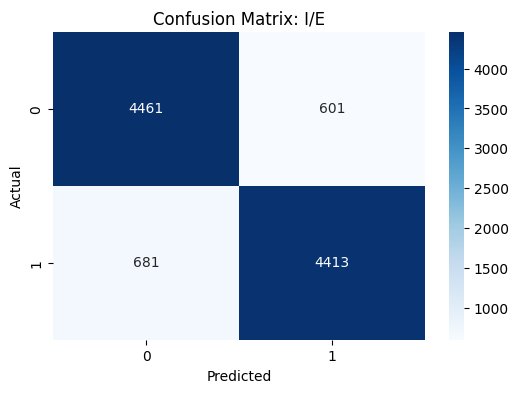

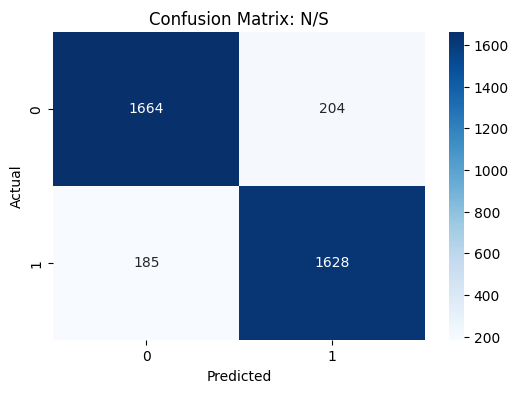

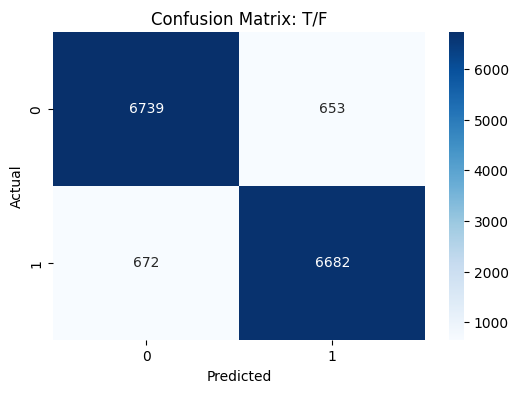

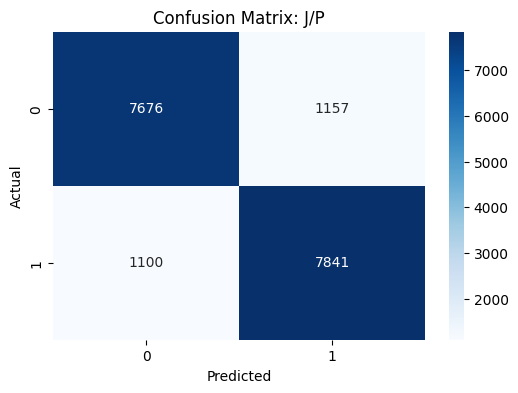

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix 시각화 함수 정의
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
    plt.title(f"Confusion Matrix: {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Confusion Matrix 계산 및 시각화 함수 정의
def calculate_and_plot_confusion(models, X_tests, y_tests, labels):
    for model, X_test, y_test, label in zip(models, X_tests, y_tests, labels):
        y_pred = model.predict(X_test)
        plot_confusion_matrix(y_test, y_pred, title=label)

# 모델과 데이터 리스트 준비
models = [model_ie, model_ns, model_tf, model_jp]
X_tests = [X_test_ie, X_test_ns, X_test_tf, X_test_jp]
y_tests = [y_test_ie, y_test_ns, y_test_tf, y_test_jp]
labels = ["I/E", "N/S", "T/F", "J/P"]

# Confusion Matrix 출력
calculate_and_plot_confusion(models, X_tests, y_tests, labels)


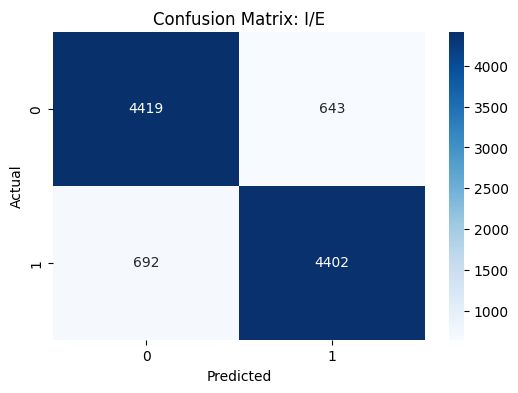

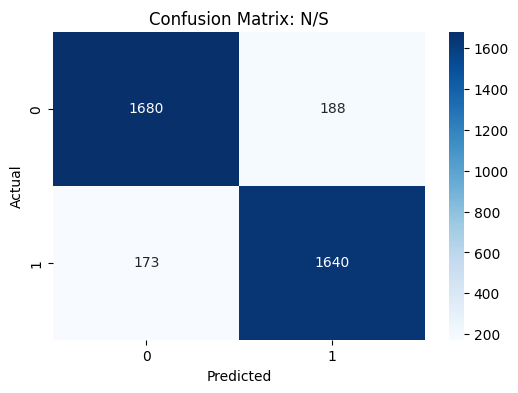

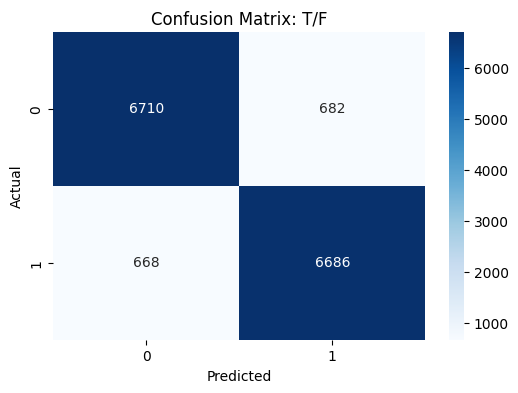

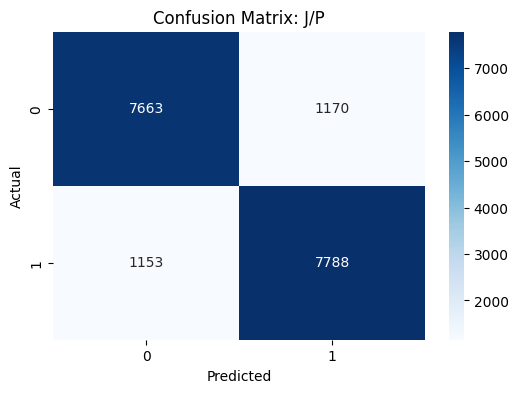

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix 시각화 함수 정의
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
    plt.title(f"Confusion Matrix: {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Confusion Matrix 계산 및 시각화 함수 정의
def calculate_and_plot_confusion(models, X_tests, y_tests, labels):
    for model, X_test, y_test, label in zip(models, X_tests, y_tests, labels):
        y_pred = model.predict(X_test)
        plot_confusion_matrix(y_test, y_pred, title=label)

# 모델과 데이터 리스트 준비
models = [model_ie, model_ns, model_tf, model_jp]
X_tests = [X_test_ie, X_test_ns, X_test_tf, X_test_jp]
y_tests = [y_test_ie, y_test_ns, y_test_tf, y_test_jp]
labels = ["I/E", "N/S", "T/F", "J/P"]

# Confusion Matrix 출력
calculate_and_plot_confusion(models, X_tests, y_tests, labels)


In [2]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import kagglehub

# Kaggle 데이터 다운로드
path = kagglehub.dataset_download("zeyadkhalid/mbti-personality-types-500-dataset")
print("Path to dataset files:", path)

# 데이터 로드 및 전처리
df = pd.read_csv(f"{path}/MBTI 500.csv")
df = df.dropna(subset=['type', 'posts'])


# TF-IDF 변환
vectorizer = TfidfVectorizer(max_features=1000, max_df=0.9)
X = vectorizer.fit_transform(df['posts']).toarray()

# 각 차원별 레이블 생성
df['I_E'] = df['type'].apply(lambda x: 1 if x[0] == 'E' else 0)
df['N_S'] = df['type'].apply(lambda x: 1 if x[1] == 'S' else 0)
df['T_F'] = df['type'].apply(lambda x: 1 if x[2] == 'F' else 0)
df['J_P'] = df['type'].apply(lambda x: 1 if x[3] == 'P' else 0)

# DownSampling 함수 정의
def downsample(df, target_col):
    minority_class_size = df[target_col].value_counts().min()
    df_majority = df[df[target_col] == df[target_col].value_counts().idxmax()]
    df_minority = df[df[target_col] == df[target_col].value_counts().idxmin()]
    df_majority_downsampled = resample(
        df_majority,
        replace=False,
        n_samples=minority_class_size,
        random_state=42
    )
    df_balanced = pd.concat([df_majority_downsampled, df_minority])
    return df_balanced

# 각 차원별 DownSampling 수행
df_ie_balanced = downsample(df, 'I_E')
df_ns_balanced = downsample(df, 'N_S')
df_tf_balanced = downsample(df, 'T_F')
df_jp_balanced = downsample(df, 'J_P')

# DownSampling 후 데이터 확인
print("I_E Balance:\n", df_ie_balanced['I_E'].value_counts())
print("N_S Balance:\n", df_ns_balanced['N_S'].value_counts())
print("T_F Balance:\n", df_tf_balanced['T_F'].value_counts())
print("J_P Balance:\n", df_jp_balanced['J_P'].value_counts())

# 학습 및 평가 함수 정의 (LightGBM 하이퍼파라미터 튜닝 포함)
def train_and_predict(X_train, y_train, X_test, y_test, label):
    # LightGBM 모델 정의 및 하이퍼파라미터 설정
    model = LGBMClassifier(
        num_leaves=100,  # 트리의 최대 리프 노드 수
        max_depth=13,   # 트리의 최대 깊이
        learning_rate=0.1,  # 학습률
        n_estimators=500,    # 부스팅 라운드 수
        min_child_samples=20,  # 리프 노드에 필요한 최소 데이터 수
        subsample=0.8,  # 데이터 샘플링 비율
        colsample_bytree=0.8,  # 각 트리별 피처 샘플링 비율
        random_state=42
    )

    # 모델 학습
    model.fit(X_train, y_train)

    # 예측 및 평가
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {label}: {accuracy}")
    return model

# 각 차원별 데이터 분할 및 모델 학습
def prepare_and_train(df_balanced, label):
    X_balanced = vectorizer.transform(df_balanced['posts']).toarray()
    y_balanced = df_balanced[label]
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
    model = train_and_predict(X_train, y_train, X_test, y_test, label)
    return model, X_test, y_test

# 각 차원별 학습
model_ie, X_test_ie, y_test_ie = prepare_and_train(df_ie_balanced, 'I_E')
model_ns, X_test_ns, y_test_ns = prepare_and_train(df_ns_balanced, 'N_S')
model_tf, X_test_tf, y_test_tf = prepare_and_train(df_tf_balanced, 'T_F')
model_jp, X_test_jp, y_test_jp = prepare_and_train(df_jp_balanced, 'J_P')

# 최종 MBTI 예측 및 정확도 계산
def calculate_final_accuracy(X_test, y_test_full):
    predictions = []
    for x in X_test:
        x = x.reshape(1, -1)
        ie = 'E' if model_ie.predict(x)[0] == 1 else 'I'
        ns = 'S' if model_ns.predict(x)[0] == 1 else 'N'
        tf = 'F' if model_tf.predict(x)[0] == 1 else 'T'
        jp = 'P' if model_jp.predict(x)[0] == 1 else 'J'
        predictions.append(ie + ns + tf + jp)

    correct_predictions = sum([1 for true, pred in zip(y_test_full, predictions) if true == pred])
    final_accuracy = correct_predictions / len(y_test_full)
    return final_accuracy

# 전체 MBTI 유형 데이터로 최종 예측
X_full_test, y_full_test = vectorizer.transform(df['posts']).toarray(), df['type']
final_accuracy = calculate_final_accuracy(X_full_test, y_full_test)
print("Final MBTI Prediction Accuracy with tuned parameters:", final_accuracy)


Path to dataset files: /root/.cache/kagglehub/datasets/zeyadkhalid/mbti-personality-types-500-dataset/versions/1
I_E Balance:
 I_E
0    25390
1    25390
Name: count, dtype: int64
N_S Balance:
 N_S
0    9201
1    9201
Name: count, dtype: int64
T_F Balance:
 T_F
0    36864
1    36864
Name: count, dtype: int64
J_P Balance:
 J_P
1    44435
0    44435
Name: count, dtype: int64
[LightGBM] [Info] Number of positive: 20296, number of negative: 20328
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.128691 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255000
[LightGBM] [Info] Number of data points in the train set: 40624, number of used features: 1000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499606 -> initscore=-0.001575
[LightGBM] [Info] Start training from score -0.001575
Accuracy for I_E: 0.8737692004726271
[LightGBM] [Info] Number of positive: 7388, number of negative: 7333
[LightGBM] [Info] Aut

In [ ]:

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import kagglehub

# Kaggle 데이터 다운로드
path = kagglehub.dataset_download("zeyadkhalid/mbti-personality-types-500-dataset")
print("Path to dataset files:", path)

# 데이터 로드 및 전처리
df = pd.read_csv(f"{path}/MBTI 500.csv")
df = df.dropna(subset=['type', 'posts'])


# TF-IDF 변환
vectorizer = TfidfVectorizer(max_features=1000, max_df=0.9)
X = vectorizer.fit_transform(df['posts']).toarray()

# 각 차원별 레이블 생성
df['I_E'] = df['type'].apply(lambda x: 1 if x[0] == 'E' else 0)
df['N_S'] = df['type'].apply(lambda x: 1 if x[1] == 'S' else 0)
df['T_F'] = df['type'].apply(lambda x: 1 if x[2] == 'F' else 0)
df['J_P'] = df['type'].apply(lambda x: 1 if x[3] == 'P' else 0)

# DownSampling 함수 정의
def downsample(df, target_col):
    minority_class_size = df[target_col].value_counts().min()
    df_majority = df[df[target_col] == df[target_col].value_counts().idxmax()]
    df_minority = df[df[target_col] == df[target_col].value_counts().idxmin()]
    df_majority_downsampled = resample(
        df_majority,
        replace=False,
        n_samples=minority_class_size,
        random_state=42
    )
    df_balanced = pd.concat([df_majority_downsampled, df_minority])
    return df_balanced

# 각 차원별 DownSampling 수행
df_ie_balanced = downsample(df, 'I_E')
df_ns_balanced = downsample(df, 'N_S')
df_tf_balanced = downsample(df, 'T_F')
df_jp_balanced = downsample(df, 'J_P')

# DownSampling 후 데이터 확인
print("I_E Balance:\n", df_ie_balanced['I_E'].value_counts())
print("N_S Balance:\n", df_ns_balanced['N_S'].value_counts())
print("T_F Balance:\n", df_tf_balanced['T_F'].value_counts())
print("J_P Balance:\n", df_jp_balanced['J_P'].value_counts())

# 학습 및 평가 함수 정의 (파라미터 수정 포함)
def train_and_predict(X_train, y_train, X_test, y_test, label):
    # GradientBoostingClassifier 모델 정의 및 파라미터 설정
    model = GradientBoostingClassifier(
        n_estimators=500,      # 부스팅 단계 수 (기본값 100 → 200)
        learning_rate=0.05,    # 학습률 (기본값 0.1 → 0.05)
        max_depth=7,           # 트리 최대 깊이 (기본값 3 → 4)
        subsample=0.9,         # 데이터 샘플링 비율 (기본값 1.0 → 0.9)
        min_samples_split=5,   # 노드 분할에 필요한 최소 샘플 수 (기본값 2 → 5)
        min_samples_leaf=2,    # 리프 노드에 필요한 최소 샘플 수 (기본값 1 → 2)
        random_state=42        # 랜덤 시드 설정
    )

    # 모델 학습
    model.fit(X_train, y_train)

    # 예측 및 평가
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {label}: {accuracy}")
    return model

# 각 차원별 데이터 분할 및 모델 학습
def prepare_and_train(df_balanced, label):
    X_balanced = vectorizer.transform(df_balanced['posts']).toarray()
    y_balanced = df_balanced[label]
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
    model = train_and_predict(X_train, y_train, X_test, y_test, label)
    return model, X_test, y_test

# 각 차원별 학습
model_ie, X_test_ie, y_test_ie = prepare_and_train(df_ie_balanced, 'I_E')
model_ns, X_test_ns, y_test_ns = prepare_and_train(df_ns_balanced, 'N_S')
model_tf, X_test_tf, y_test_tf = prepare_and_train(df_tf_balanced, 'T_F')
model_jp, X_test_jp, y_test_jp = prepare_and_train(df_jp_balanced, 'J_P')

# 최종 MBTI 예측 및 정확도 계산
def calculate_final_accuracy(X_test, y_test_full):
    predictions = []
    for x in X_test:
        x = x.reshape(1, -1)
        ie = 'E' if model_ie.predict(x)[0] == 1 else 'I'
        ns = 'S' if model_ns.predict(x)[0] == 1 else 'N'
        tf = 'F' if model_tf.predict(x)[0] == 1 else 'T'
        jp = 'P' if model_jp.predict(x)[0] == 1 else 'J'
        predictions.append(ie + ns + tf + jp)

    correct_predictions = sum([1 for true, pred in zip(y_test_full, predictions) if true == pred])
    final_accuracy = correct_predictions / len(y_test_full)
    return final_accuracy

# 전체 MBTI 유형 데이터로 최종 예측
X_full_test, y_full_test = vectorizer.transform(df['posts']).toarray(), df['type']
final_accuracy = calculate_final_accuracy(X_full_test, y_full_test)
print("Final MBTI Prediction Accuracy with tuned parameters:", final_accuracy)


Path to dataset files: /root/.cache/kagglehub/datasets/zeyadkhalid/mbti-personality-types-500-dataset/versions/1
I_E Balance:
 I_E
0    25390
1    25390
Name: count, dtype: int64
N_S Balance:
 N_S
0    9201
1    9201
Name: count, dtype: int64
T_F Balance:
 T_F
0    36864
1    36864
Name: count, dtype: int64
J_P Balance:
 J_P
1    44435
0    44435
Name: count, dtype: int64
